In [1]:
import numpy as np
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt
import time
import pandas as pd

In [61]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager # to solve: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.

font_size = 10

# matplotlib.rcParams.keys()
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400,'axes.linewidth':1,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size} # 'figure.figsize':(11.7/1.5,8.27/1.5)

sns.set(style='ticks',rc=rc) 
sns.set_context("paper")
# sns.palplot(sns.color_palette(flatui))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.unicode_minus']=False # negative minus sign
centimeter = 1/2.54  # centimeter in inches

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
# sc.settings.set_figure_params(dpi=400, dpi_save=400, figsize=(6,6), fontsize = 10, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==1.1.2 statsmodels==0.12.2 python-igraph==0.9.11 pynndescent==0.5.7


In [4]:
from _utils import get_adata, update_celltype,set_cell2loc_palette
import edge


In [5]:
sample_list=['CDQ_C3','CDQ_D4','CDQ_E3','CXF_D1','HX_D3','LJT_F6','TJ_E4','GXY_F3','ZZW_F5']
adata_paths = [r'/hwfssz1/ST_HEALTH/P20Z10200N0170/jiangyongchao/project/HX_lung/cell2loc/'+pat_id+'_bin100.leiden.cell2location.gzip.h5ad' 
               for pat_id in sample_list]
adata_fnames = dict(zip(sample_list, adata_paths))


In [6]:
pat_id = 'CXF_D1' # IA
adata=get_adata(adata_fnames[pat_id], log=True)

normalizing counts per cell
    finished (0:00:03)


In [7]:
celltype_list = ['AT1', 'AT2', 'AT2_like', 'B_cell', 'Basal', 'Ciliated', 'Club', 'DC', 
                 'Endothelial', 'Erythrocyte', 'Fibroblast', 'Granulocyte', 'MAST_cell', 'Macrophage', 'NK', 'T_cell']
update_celltype(adata,celltype_list,min_frac_ct=1.2,update_cell2loc=True)


In [8]:
adata

AnnData object with n_obs × n_vars = 31283 × 13349
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'sample', '_indices', '_scvi_batch', '_scvi_labels', 'AT1', 'AT2', 'AT2_like', 'B_cell', 'Basal', 'Ciliated', 'Club', 'DC', 'Endothelial', 'Erythrocyte', 'Fibroblast', 'Granulocyte', 'MAST_cell', 'Macrophage', 'NK', 'T_cell', 'cell2location_max'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'SYMBOL', 'MT_gene'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'mod', 'log1p'
    obsm: 'MT', 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf', 'cell_type_update'
    

In [9]:
adata.obsm['cell_type_update']

AT1       AT2  AT2_like    B_cell     Basal  Ciliated  \
cell_name                                                               
1-100      0.155411  0.113975  0.145282  0.015394  0.038494  0.050481   
1-101      0.186520  0.148162  0.041848  0.015952  0.045449  0.051161   
1-102      0.132238  0.109278  0.032550  0.016742  0.054060  0.056221   
1-103      0.116386  0.138145  0.095079  0.008238  0.089937  0.056956   
1-104      0.181430  0.119324  0.038370  0.031324  0.077259  0.038588   
...             ...       ...       ...       ...       ...       ...   
99-95      0.058459  0.140581  0.060947  0.184697  0.072810  0.049739   
99-96      0.053321  0.044205  0.073469  0.129580  0.089958  0.070740   
99-97      0.033922  0.095016  0.060383  0.101768  0.067860  0.033441   
99-98      0.026673  0.084656  0.338929  0.095714  0.053375  0.040388   
99-99      0.011284  0.128711  0.154403  0.271061  0.039221  0.026224   

               Club        DC  Endothelial  Erythrocyte  Fibroblast  \
cell_name                                                             
1-100      0.083795  0.032645     0.119002     0.029047    0.076268   
1-101      0.077313  0.014122     0.129543     0.055968    0.079199   
1-102      0.103882  0.024108     0.171514     0.040239    0.090107   
1-103      0.092627  0.014865     0.106300     0.038535    0.058246   
1-104      0.083111  0.032223     0.101275     0.024634    0.066741   
...             ...       ...          ...          ...         ...   
99-95      0.051499  0.029111     0.047589     0.002356    0.098417   
99-96      0.050356  0.044866     0.131549     0.006379    0.090946   
99-97      0.047514  0.046120     0.063445     0.005560    0.187568   
99-98      0.030607  0.076369     0.039397     0.003484    0.039518   
99-99      0.020879  0.056051     0.019190     0.002188    0.040041   

           Granulocyte  MAST_cell  Macrophage        NK    T_cell  \
cell_name                                                           
1-100         0.032877   0.018411    0.023857  0.040960  0.024103   
1-101         0.057435   0.024160    0.018469  0.039895  0.014804   
1-102         0.068108   0.013662    0.026158  0.037721  0.023411   
1-103         0.049651   0.034127    0.045715  0.030585  0.024609   
1-104         0.074488   0.025256    0.015318  0.048031  0.042627   
...                ...        ...         ...       ...       ...   
99-95         0.017013   0.021817    0.014335  0.035428  0.115201   
99-96         0.018151   0.018147    0.016292  0.031266  0.130772   
99-97         0.024695   0.025750    0.018980  0.033558  0.154420   
99-98         0.007723   0.029449    0.022870  0.021591  0.089258   
99-99         0.005678   0.030500    0.011634  0.026680  0.156254   

           sec_max_ind  top_max_ind     ratio    ct_update  
cell_name                                                   
1-100                2            0  1.069723     NOT_SPEC  
1-101                1            0  1.258898          AT1  
1-102                0            8  1.297009  Endothelial  
1-103                0            1  1.186958     NOT_SPEC  
1-104                1            0  1.520479          AT1  
...                ...          ...       ...          ...  
99-95                1            3  1.313809       B_cell  
99-96               15            8  1.005941     NOT_SPEC  
99-97               15           10  1.214663   Fibroblast  
99-98                3            2  3.541071     AT2_like  
99-99               15            3  1.734742       B_cell  

[31283 rows x 20 columns]

In [37]:
im_map = edge.creat_imarray(adata)
area, boundary = edge.find_boundary(im_map, min_thre_binary=130, 
                 max_thre_binary=255, 
                 gaussian_sigma=10, 
                 canny_thre1=200, 
                 canny_thre2=255)


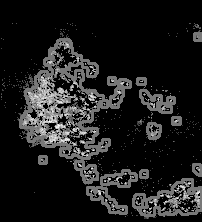

In [38]:
from PIL import Image
import cv2

im_map_raw = im_map.copy()
cv2.drawContours(im_map_raw, boundary, -1, 120, 2)
Image.fromarray(im_map_raw)

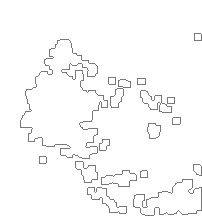

In [39]:
# just show boundary
CntExternalMask = np.ones(im_map.shape[:2], dtype="uint8") * 255
cv2.drawContours(CntExternalMask, boundary, -1, 120, 1)
Image.fromarray(CntExternalMask)

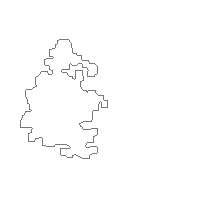

In [91]:
smoothed_b = edge.smooth_boundary([boundary[0]], factor=0.001, intp=False) # 0.001

CntExternalMask = np.ones(im_map.shape[:2], dtype="uint8") * 255
cv2.drawContours(CntExternalMask, smoothed_b, -1, 120, 1)
Image.fromarray(CntExternalMask)


In [92]:
def _filter_line(bound_ploy, x_left, x_right, y_bottom, y_top):
    """
    x_left < x_right
    y_bottom > y_top
    """
    u_bound = []
    for x,y in zip(bound_ploy.boundary.xy[0],bound_ploy.boundary.xy[1]):
        if (x > x_left and y > y_top) and (x < x_right and y < y_bottom):
            u_bound.append([x,y])
    return np.array(u_bound)

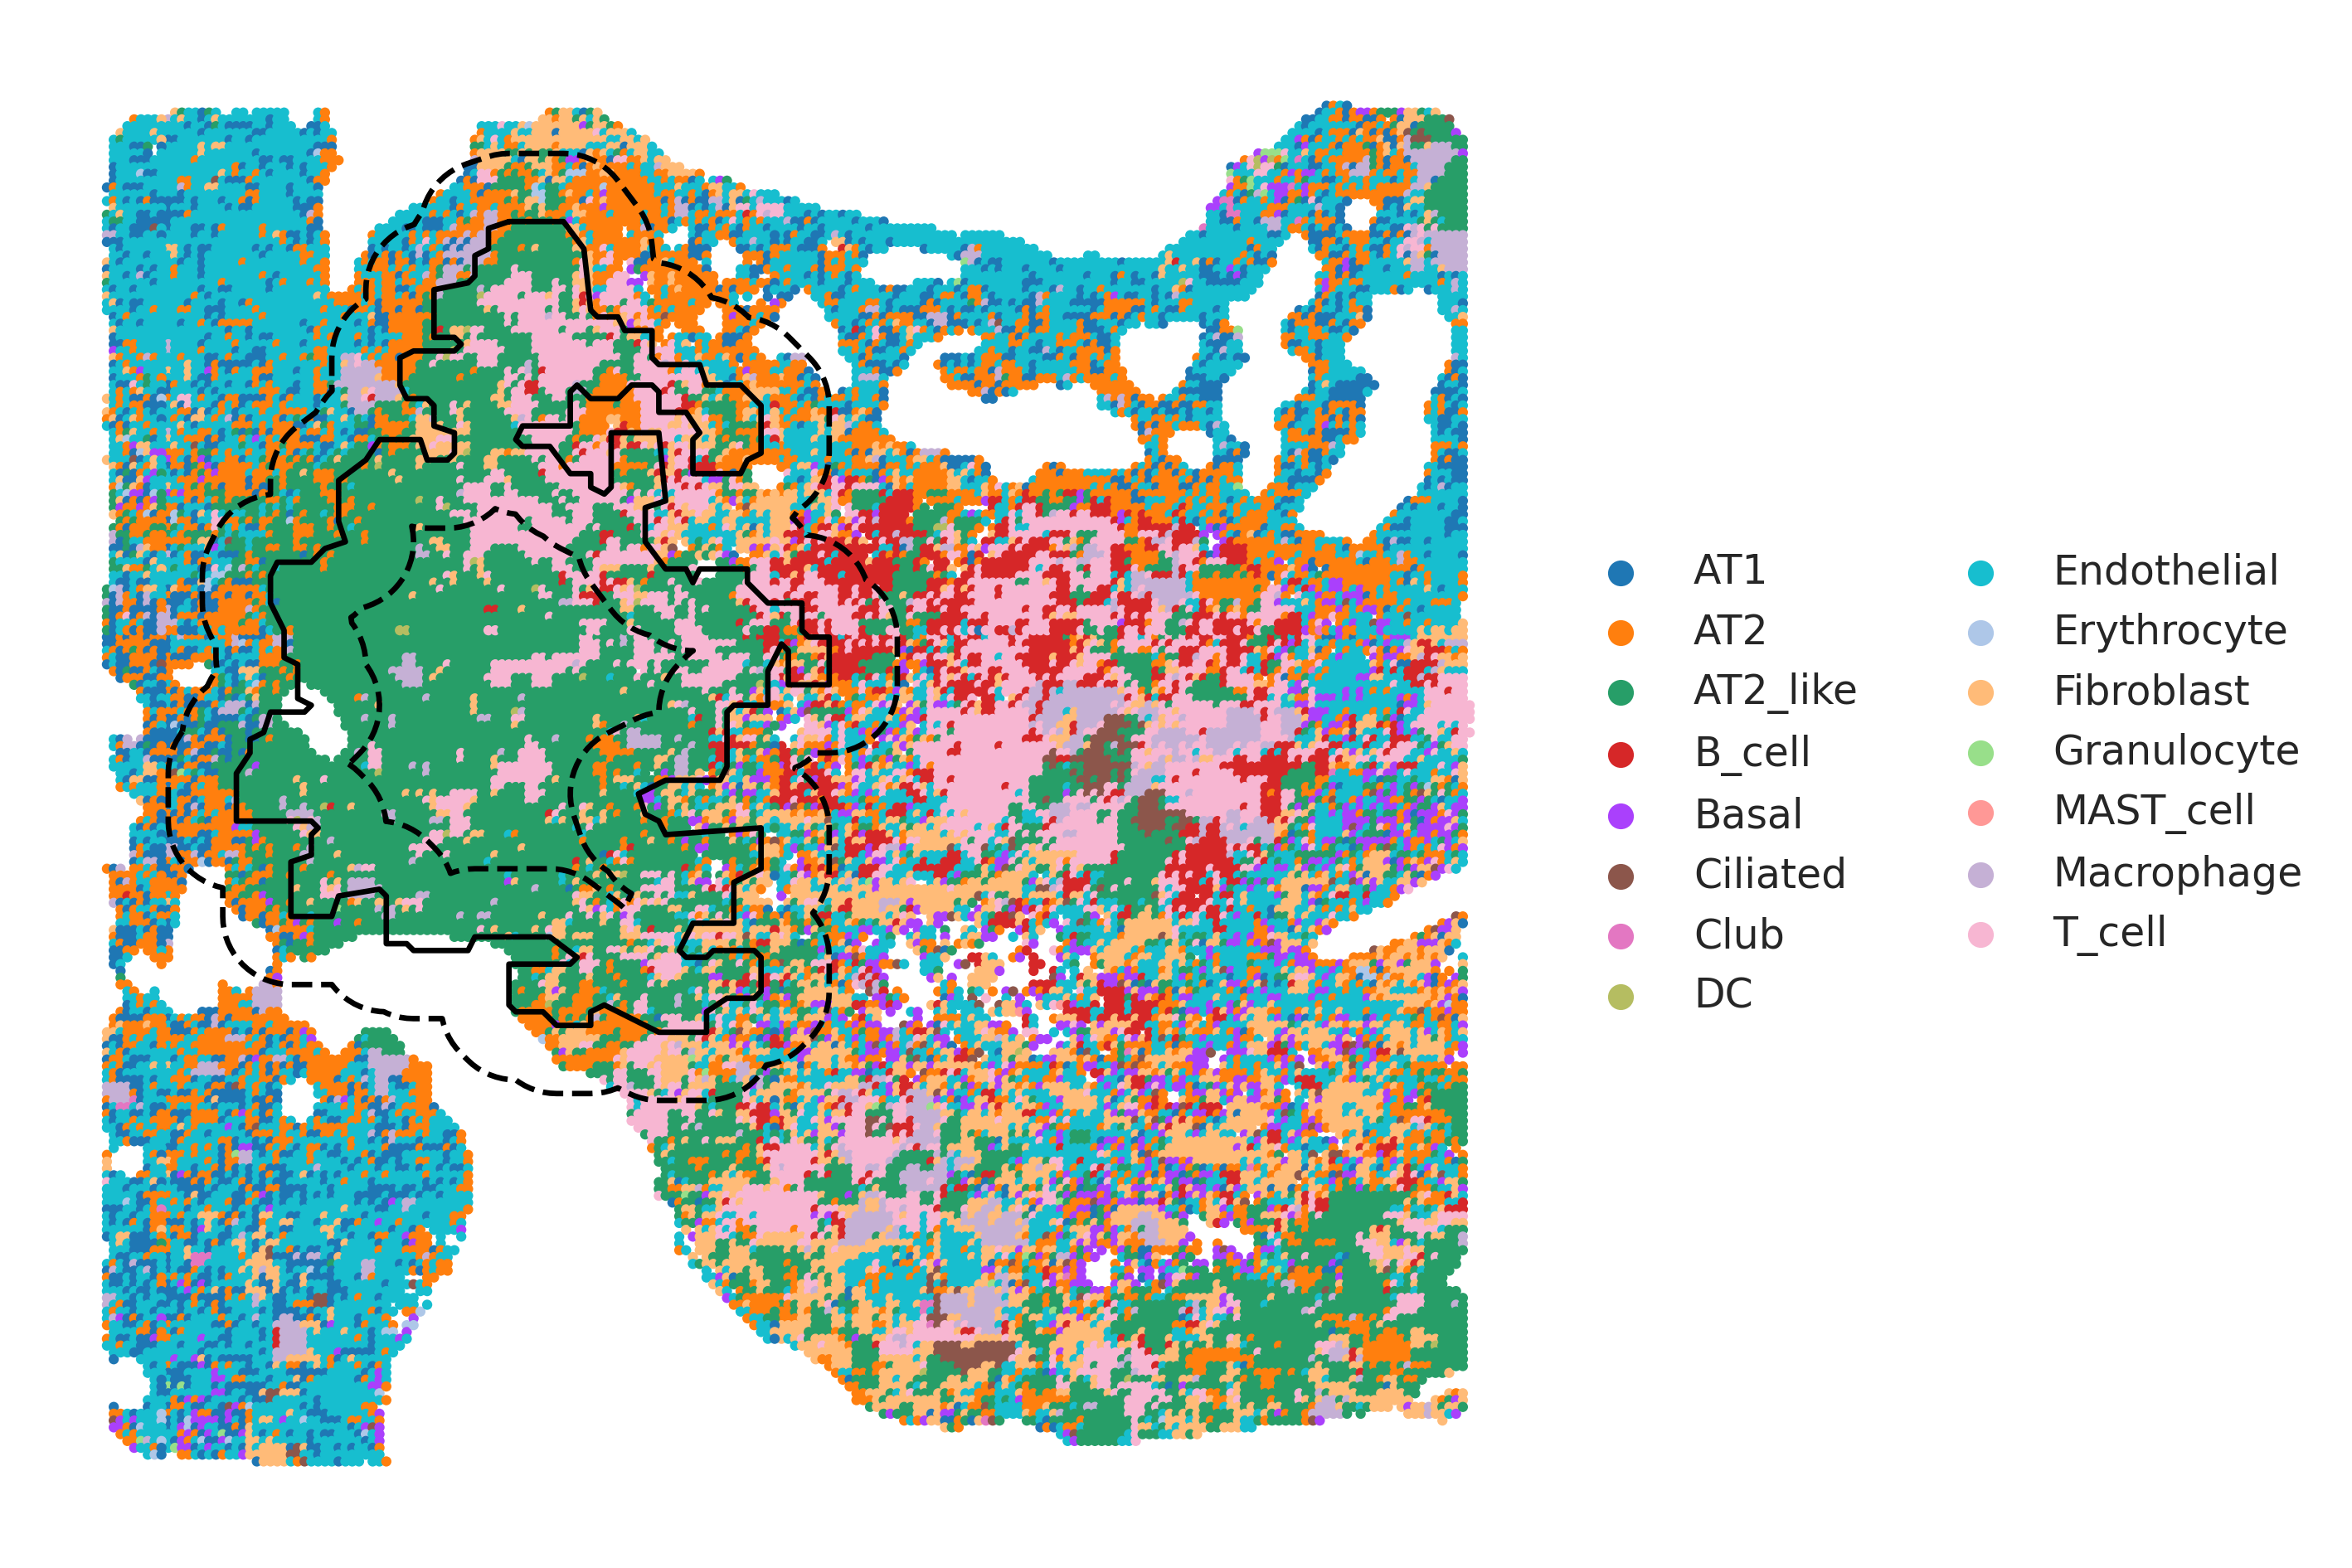

In [93]:
# draw plot to show boundary
# distance = 10, equal to 500 mum
roi_b = smoothed_b[0]
o_b, f_b, b_b = edge.find_distance_boundary(roi_b, distance=10)

fig,ax = plt.subplots(figsize=(6,6))
sc.pl.spatial(adata, color=['cell2location_max'], title='', spot_size=1.5,frameon = False, show=False, ax=ax, palette = set_cell2loc_palette(celltype_list))

x_left, x_right = ax.get_xlim()
y_bottom, y_top = ax.get_ylim()

ob_b = _filter_line(o_b, x_left+10, x_right-10, y_bottom, y_top)
fb_b = _filter_line(f_b, x_left+10, x_right-30, y_bottom-50, y_top+10)
bb_b = _filter_line(b_b, x_left+20, x_right-10, y_bottom-55, y_top+10)

ax.plot(ob_b[:,0],ob_b[:,1], color='black')
ax.plot(fb_b[:,0],fb_b[:,1], color='black', linestyle='dashed')
ax.plot(bb_b[:,0],bb_b[:,1], color='black', linestyle='dashed')

plt.savefig(f"results/edge/boundary_{pat_id}.pdf", dpi=400, bbox_inches='tight',format='pdf')

In [94]:
ax.get_xlim(),ax.get_ylim()

((-9.825000000000001, 211.825), (231.775, 11.225))

In [95]:
from shapely.geometry import Point
coords = adata.obsm['spatial']
coords_pt = list(map(Point, zip(coords[:,0],coords[:,1])))

def get_pt_btw_boundary(coords_pt, outer_b, in_b):
    return np.array([1 if outer_b.contains(i) and not in_b.contains(i) else 0 for i in coords_pt])

In [96]:
distances = [5, 10, 15, 20]

o_b, f_b_p5, b_b_m5 = edge.find_distance_boundary(roi_b, distance=5)
_, f_b_p10, b_b_m10 = edge.find_distance_boundary(roi_b, distance=10)
_, f_b_p15, b_b_m15 = edge.find_distance_boundary(roi_b, distance=15)
_, f_b_p20, b_b_m20 = edge.find_distance_boundary(roi_b, distance=20)

_, f_b_p25, b_b_m25 = edge.find_distance_boundary(roi_b, distance=25)

pt_in_p5_ob = get_pt_btw_boundary(coords_pt, f_b_p5, o_b)
pt_in_p10_p5 = get_pt_btw_boundary(coords_pt, f_b_p10, f_b_p5)
pt_in_p15_p10 = get_pt_btw_boundary(coords_pt, f_b_p15, f_b_p10)
pt_in_p20_p15 = get_pt_btw_boundary(coords_pt, f_b_p20, f_b_p15)
pt_in_p25_p20 = get_pt_btw_boundary(coords_pt, f_b_p25, f_b_p20)

pt_in_m5_ob = get_pt_btw_boundary(coords_pt, o_b, b_b_m5)
pt_in_m10_m5 = get_pt_btw_boundary(coords_pt, b_b_m5, b_b_m10)
pt_in_m15_m10 = get_pt_btw_boundary(coords_pt, b_b_m10, b_b_m15)
pt_in_m20_m15 = get_pt_btw_boundary(coords_pt, b_b_m15, b_b_m20)
pt_in_m25_m20 = get_pt_btw_boundary(coords_pt, b_b_m20, b_b_m25)

In [97]:
adata_p5_ob = adata[pt_in_p5_ob==1,:]
adata_p10_p5 = adata[pt_in_p10_p5==1,:]
adata_p15_p10 = adata[pt_in_p15_p10==1,:]
adata_p20_p15 = adata[pt_in_p20_p15==1,:]

adata_p25_p20 = adata[pt_in_p25_p20==1,:]

adata_m5_ob = adata[pt_in_m5_ob==1,:]
adata_m10_m5 = adata[pt_in_m10_m5==1,:]
adata_m15_m10 = adata[pt_in_m15_m10==1,:]
adata_m20_m15 = adata[pt_in_m20_m15==1,:]

adata_m25_m20 = adata[pt_in_m25_m20==1,:]

In [98]:
adas = [adata_p5_ob, adata_p10_p5, adata_p15_p10, adata_p20_p15,adata_p25_p20, adata_m5_ob, adata_m10_m5, adata_m15_m10, adata_m20_m15,adata_m25_m20]
dist_lab = ['0-5','5-10','10-15','15-20','20-25', '-5-0', '-10--5','-15--10','-20--15','-25--20']
# dist_lab = [-1,-2,-3, -4, 1, 2, 3 , 4]
# orders = ['15-20','10-15','5-10','0-5', '-5-0', '-10--5','-15--10','-20--15']

df_cell_type_frac_regs=None
for i, ada in enumerate(adas):
    if i==0:
        df_cell_type_frac = ada.obsm['cell_type_update'].copy()
        df_cell_type_frac['region'] = [dist_lab[i]] * df_cell_type_frac.shape[0]
        df_cell_type_frac_regs = df_cell_type_frac
    else:
        df_cell_type_frac1 = ada.obsm['cell_type_update'].copy()
        df_cell_type_frac1['region'] = [dist_lab[i]] * df_cell_type_frac1.shape[0]
        df_cell_type_frac_regs = pd.concat([df_cell_type_frac_regs, df_cell_type_frac1], ignore_index=True)


In [99]:
import pickle
with open(f'results/edge/adatas_{pat_id}.pkl','wb') as f:
    pickle.dump(adas, f)

In [100]:
df_cell_type_frac_regs

AT1       AT2  AT2_like    B_cell     Basal  Ciliated      Club  \
0      0.102277  0.083925  0.020447  0.159577  0.055716  0.040020  0.076501   
1      0.042389  0.179867  0.084491  0.154245  0.045382  0.065215  0.045120   
2      0.044499  0.130642  0.147016  0.088361  0.059147  0.053990  0.036563   
3      0.048606  0.181116  0.038544  0.083515  0.128205  0.086709  0.051999   
4      0.028016  0.049807  0.150957  0.123867  0.054181  0.076435  0.029164   
...         ...       ...       ...       ...       ...       ...       ...   
14248  0.032359  0.029224  0.349219  0.032471  0.040218  0.021678  0.021425   
14249  0.003792  0.007386  0.044542  0.181547  0.023117  0.010834  0.011429   
14250  0.028861  0.025450  0.137275  0.080528  0.040001  0.026163  0.019276   
14251  0.055748  0.042898  0.267207  0.056247  0.034093  0.027010  0.036657   
14252  0.038442  0.040204  0.203706  0.054915  0.055859  0.025904  0.028436   

             DC  Endothelial  Erythrocyte  ...  Granulocyte  MAST_cell  \
0      0.021893     0.160050     0.011673  ...     0.040457   0.034910   
1      0.057880     0.044334     0.005594  ...     0.020213   0.017113   
2      0.069665     0.040301     0.008377  ...     0.039406   0.024536   
3      0.020583     0.074476     0.006078  ...     0.037639   0.011499   
4      0.043088     0.073582     0.004867  ...     0.014605   0.076512   
...         ...          ...          ...  ...          ...        ...   
14248  0.172940     0.031989     0.006633  ...     0.004143   0.024984   
14249  0.098889     0.032733     0.004752  ...     0.005148   0.041849   
14250  0.103463     0.050452     0.008444  ...     0.008922   0.032957   
14251  0.090038     0.039572     0.008689  ...     0.009749   0.038131   
14252  0.105675     0.058068     0.027159  ...     0.016534   0.028277   

       Macrophage        NK    T_cell  sec_max_ind  top_max_ind     ratio  \
0        0.006771  0.036759  0.096364            3            8  1.002964   
1        0.039416  0.024817  0.085382            3            1  1.166115   
2        0.080735  0.028223  0.079308            1            2  1.125336   
3        0.056036  0.025323  0.034951            4            1  1.412699   
4        0.042125  0.027398  0.156552            2           15  1.037068   
...           ...       ...       ...          ...          ...       ...   
14248    0.049132  0.020712  0.087970            7            2  2.019305   
14249    0.055948  0.045608  0.352266            3           15  1.940360   
14250    0.074771  0.048103  0.180409            2           15  1.314214   
14251    0.055921  0.031387  0.126070           15            2  2.119523   
14252    0.052777  0.029459  0.100712           10            2  1.521643   

       ct_update   region  
0       NOT_SPEC      0-5  
1       NOT_SPEC      0-5  
2       NOT_SPEC      0-5  
3            AT2      0-5  
4       NOT_SPEC      0-5  
...          ...      ...  
14248   AT2_like  -25--20  
14249     T_cell  -25--20  
14250     T_cell  -25--20  
14251   AT2_like  -25--20  
14252   AT2_like  -25--20  

[14253 rows x 21 columns]

In [101]:
df_cell_type_frac_regs.to_csv(f"results/edge/cell_boundary_{pat_id}.csv", index=False)

In [102]:
from matplotlib import cm, colors
x = list(map(colors.to_hex, sns.color_palette('pastel')))
print(x)
x = list(map(colors.to_hex, sns.color_palette('bright')))
print(x)


['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']
['#023eff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#f14cc1', '#a3a3a3', '#ffc400', '#00d7ff']


In [103]:
# bg_f = ['#b9f2f0', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#fffea3', ]
# ln_f = ['#00d7ff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#f14cc1', '#ffc400', ]
bg_f = ['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']
ln_f = ['#023eff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#f14cc1', '#a3a3a3', '#ffc400', '#00d7ff']

In [104]:
sns.color_palette(x)

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [105]:
import plotting

In [106]:
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches

def plot_show(df_cell_type_frac_regs, val_col, save=True, y_label='Fraction of Cell Type', gene=False, gene_cell_type=None, bg_f=bg_f, ln_f=ln_f):
    
    comp_pairs = [('20-25','15-20'),('15-20','10-15'),('10-15','5-10'),('5-10','0-5'), ('0-5','-5-0'), 
                  ('-5-0','-10--5'), ('-10--5','-15--10'),('-15--10','-20--15'),('-20--15','-25--20')]
    orders = ['20-25','15-20','10-15','5-10','0-5', '-5-0', '-10--5','-15--10','-20--15','-25--20']

    fig = plt.figure(figsize=(4.5,3.2))
    gs1 = GridSpec(2, 1, hspace=0.3,height_ratios=[8, 1.2])
    ax1 = fig.add_subplot(gs1[0])
    ax2 = fig.add_subplot(gs1[1])

    axa = plotting.boxplot(df_cell_type_frac_regs, 'region', val_col, ax1, comp_pairs,orders=orders, gene=gene,bg_f=bg_f, ln_f=ln_f)

    ax1.axvline(4.5,linewidth=0.8, color='gray', linestyle='dashed',ymax=0.6)
    ax1.tick_params(pad=1)
    ax1.set_xticklabels(
        labels=['-1250 $\mu$m','-1000 $\mu$m','-750 $\mu$m','-500 $\mu$m','-250 $\mu$m','250 $\mu$m','500 $\mu$m','750 $\mu$m','1000 $\mu$m','1250 $\mu$m'], rotation=20,ha='center', va='top')
    ax1.set_xlabel(None)
    ax1.set_ylabel(y_label)
    if not gene:
        ax1.set_title(val_col)
    else:
        ax1.set_title(f'$\it{val_col}$')

    p = patches.FancyArrowPatch((0, 0.5), (1, 0.5), arrowstyle='<|-|>', mutation_scale=10,color='k')
    ax2.add_patch(p)
    ax2.plot([0.5,0.5],[0.5016,0.51],color='k')
    ax2.text(0.15, 0.472, 'Normal', ha='center', va='center')
    ax2.text(0.5, 0.472, 'Boundary', ha='center', va='center')
    ax2.text(0.85, 0.472, 'Tumor',  ha='center', va='center')
    ax2.axis('off')
    sns.despine()
    if save:
        if gene:
            plt.savefig(f"results/edge/{gene_cell_type}_{val_col}_{pat_id}.pdf", dpi=400, bbox_inches='tight',format='pdf')
        else:
            plt.savefig(f"results/edge/ct_{val_col}_{pat_id}.pdf", dpi=400, bbox_inches='tight',format='pdf')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

20-25 vs. 15-20: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:8.784e-03 U_stat=1.131e+06
15-20 vs. 10-15: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.725e-02 U_stat=1.270e+06
10-15 vs. 5-10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.949e-02 U_stat=1.325e+06
5-10 vs. 0-5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.451e-12 U_stat=2.507e+06
0-5 vs. -5-0: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.852e-58 U_stat=3.708e+06
-5-0 vs. -10--5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.060e-26 U_stat=1.970e+06
-10--5 vs. -15--10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correct

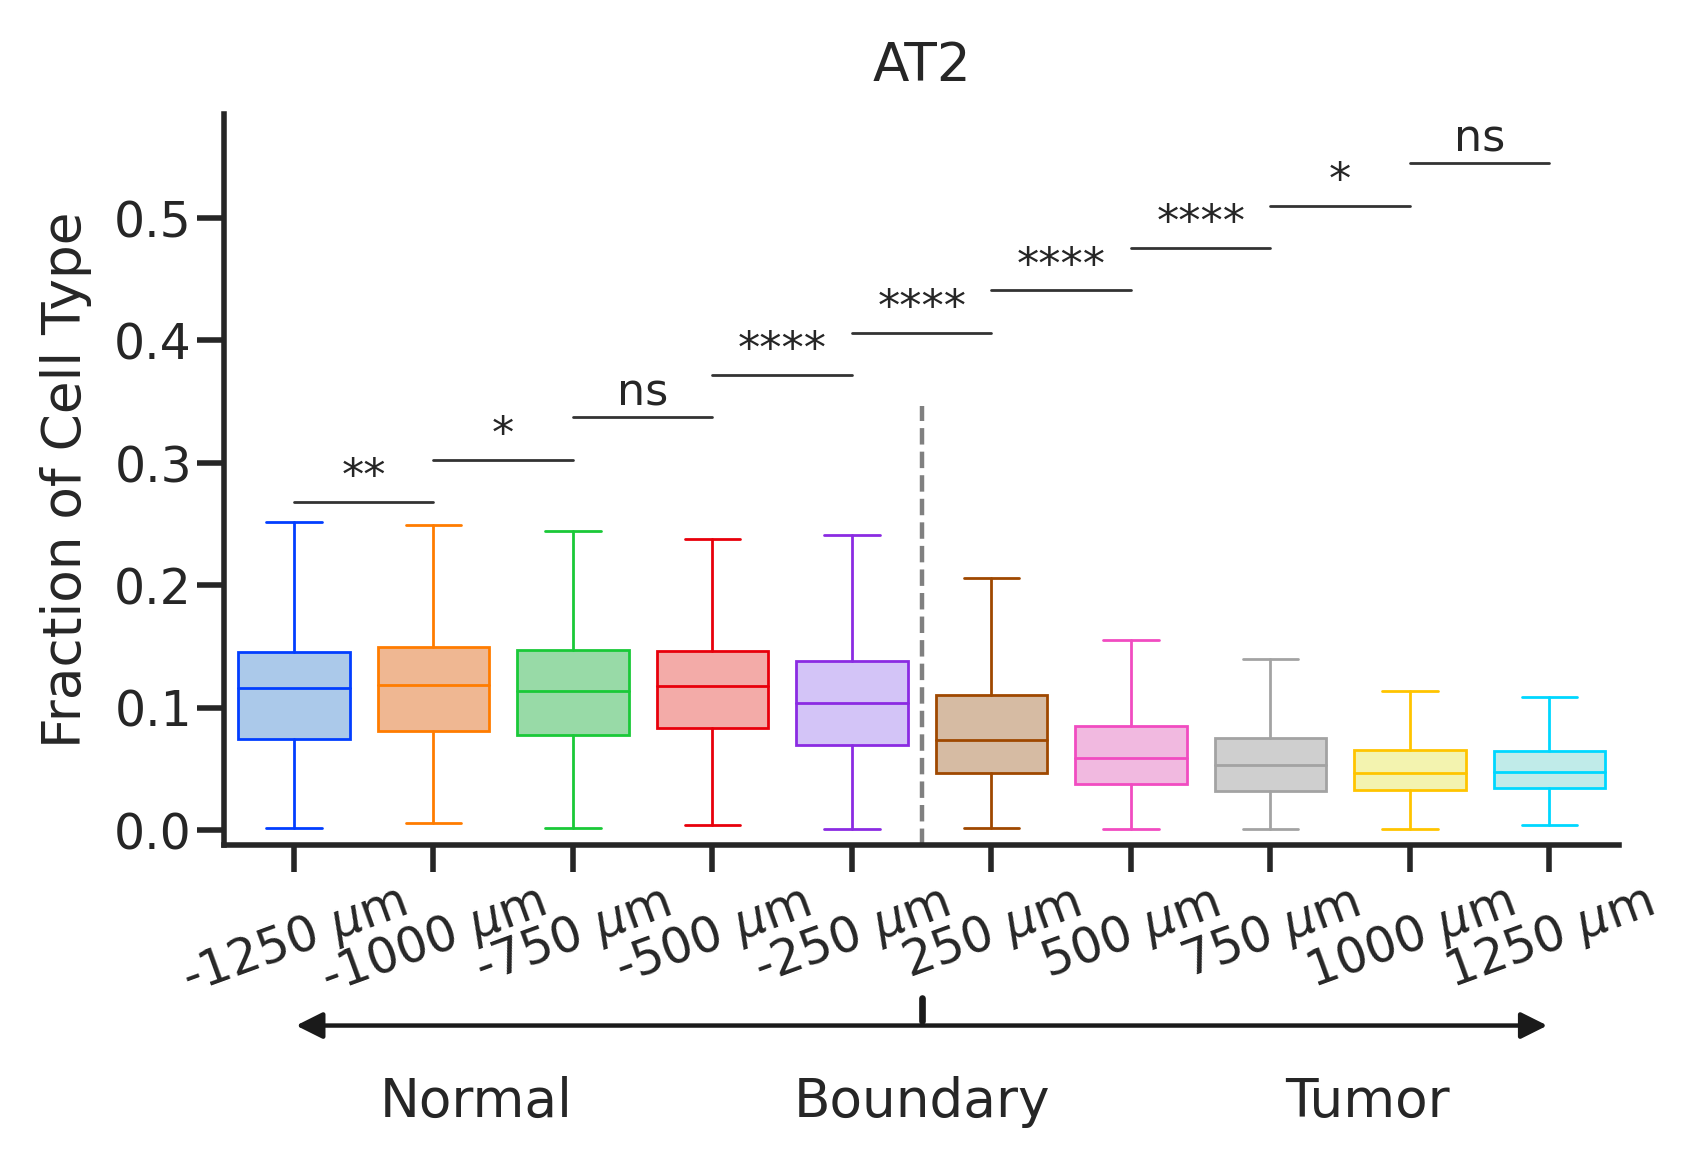

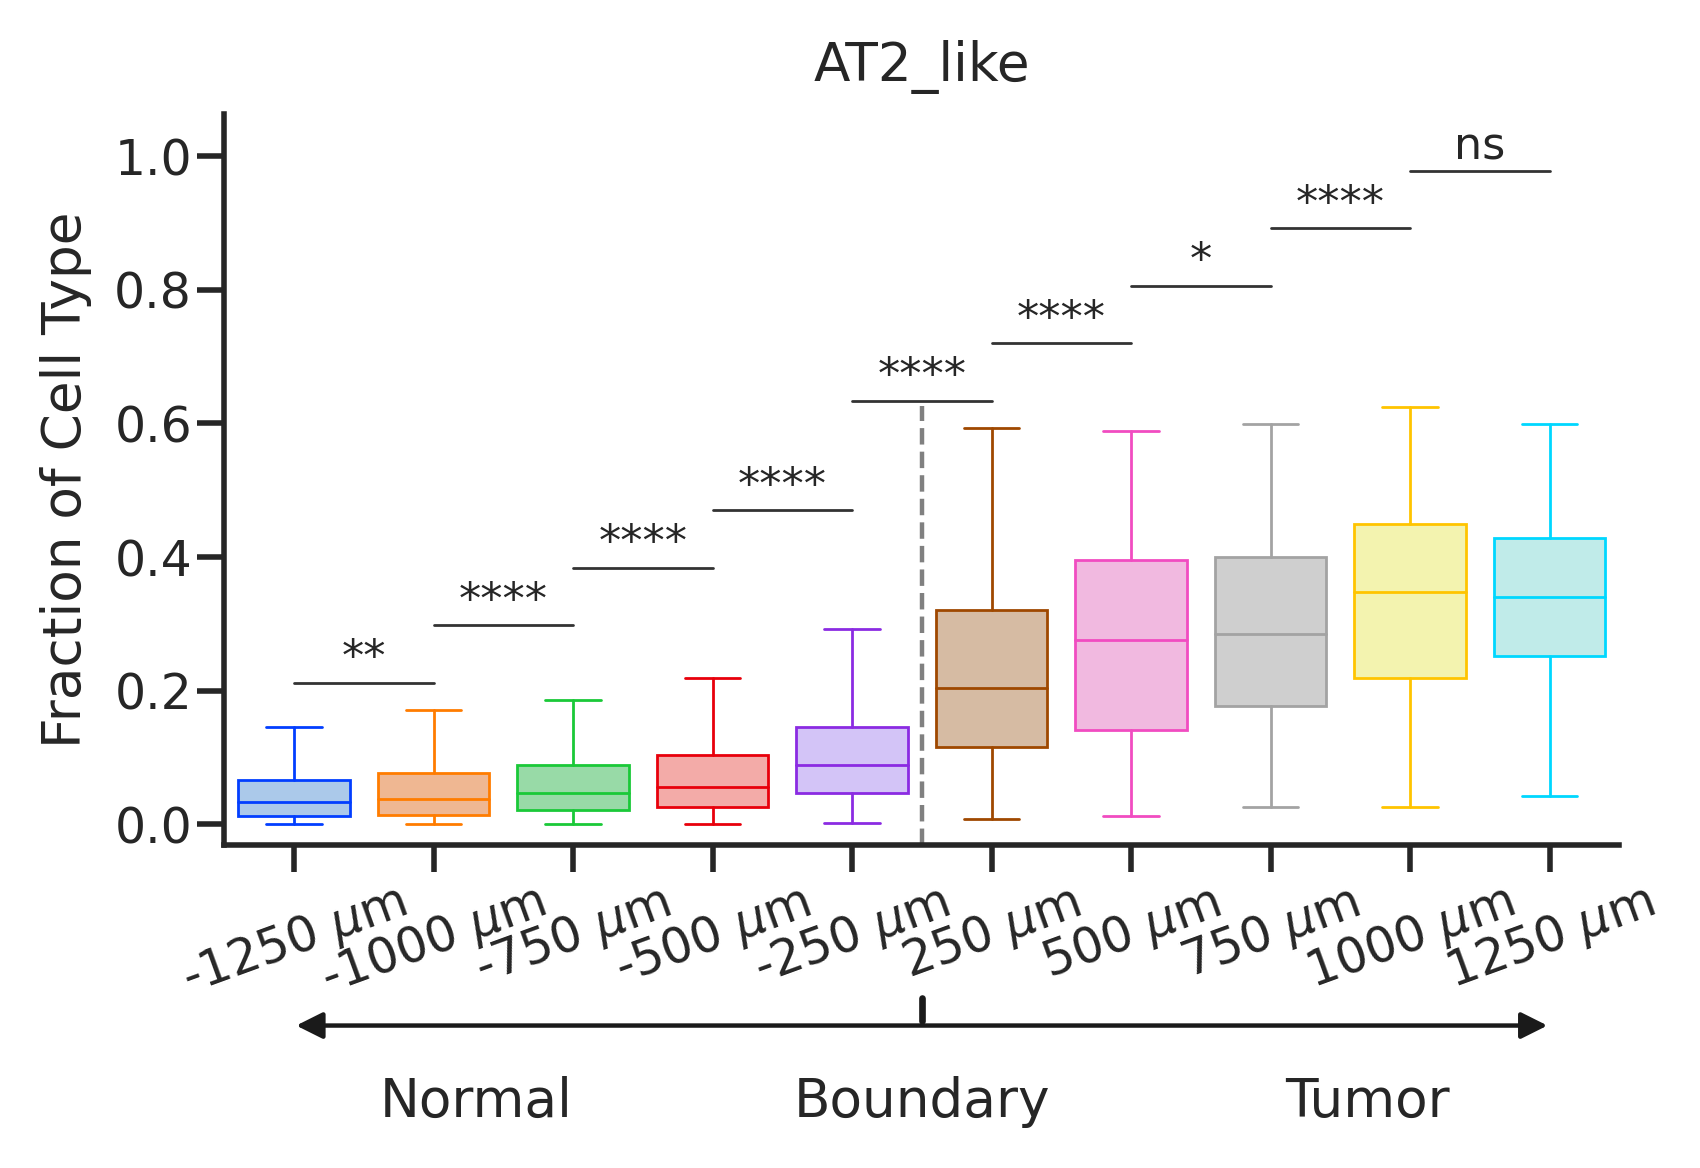

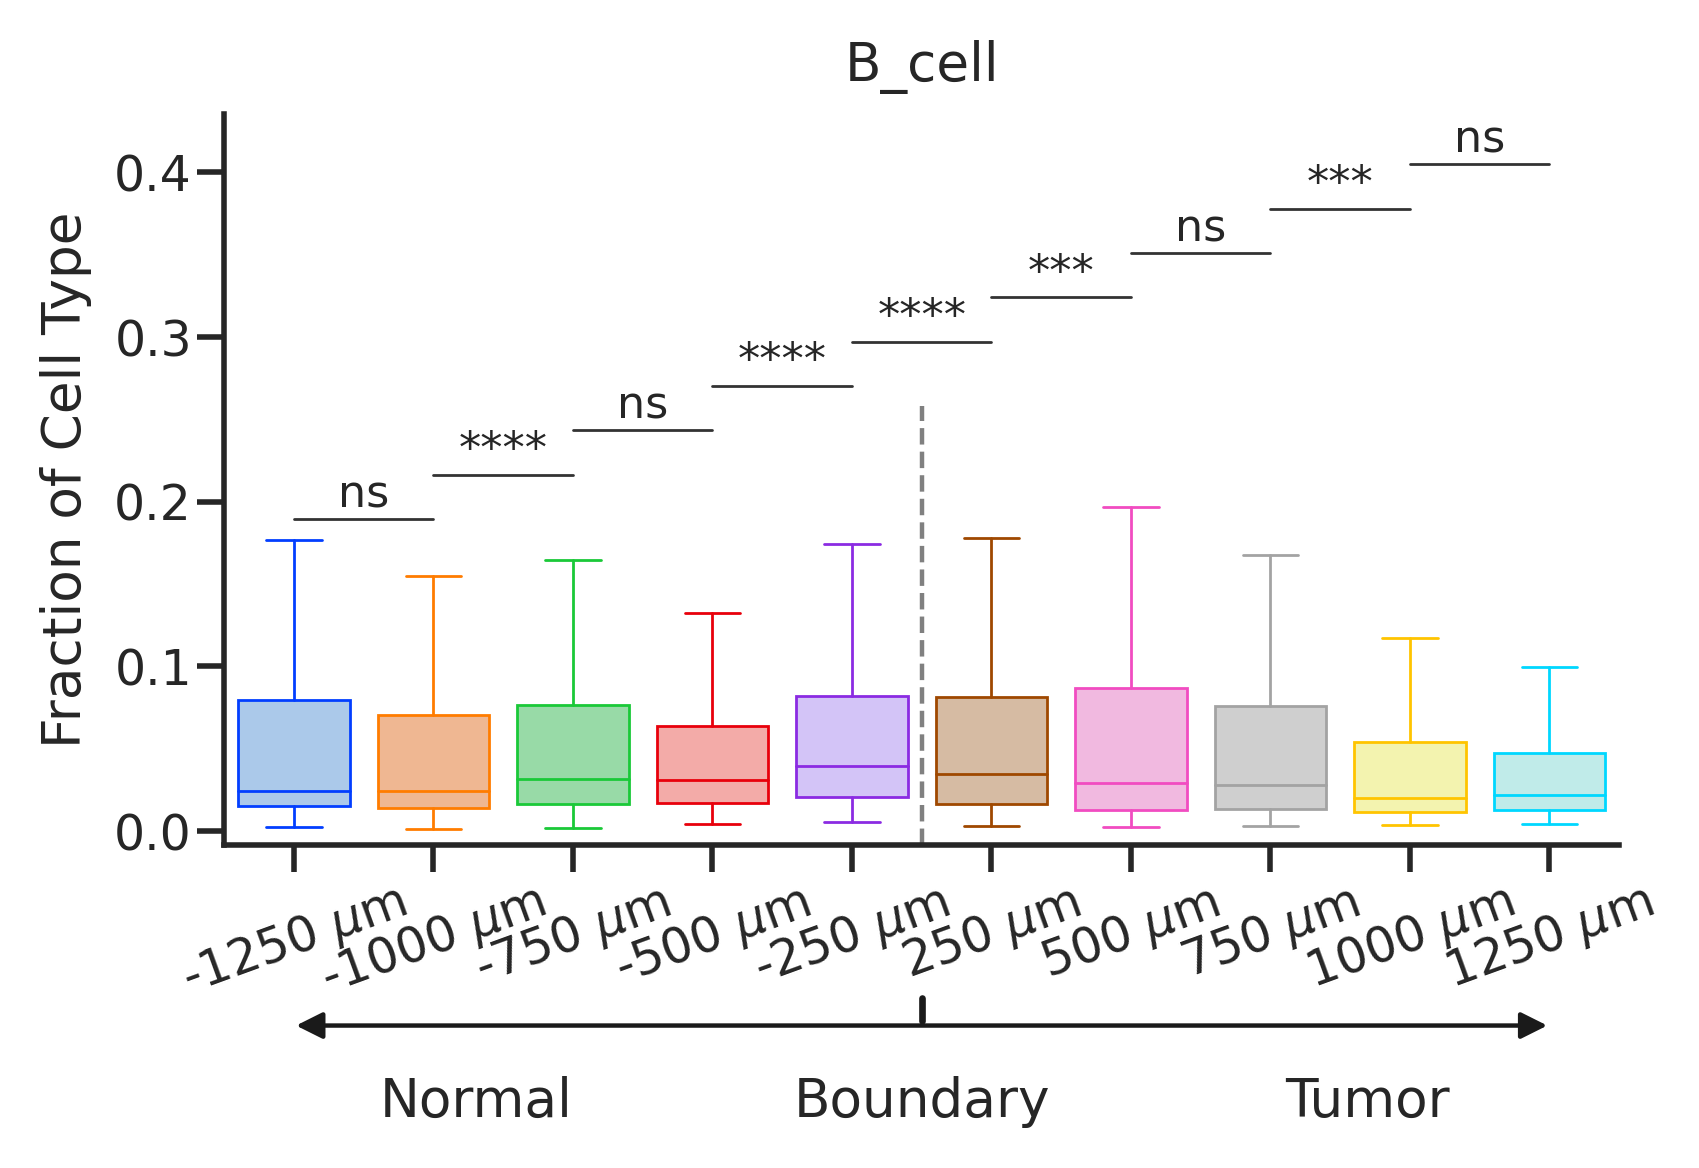

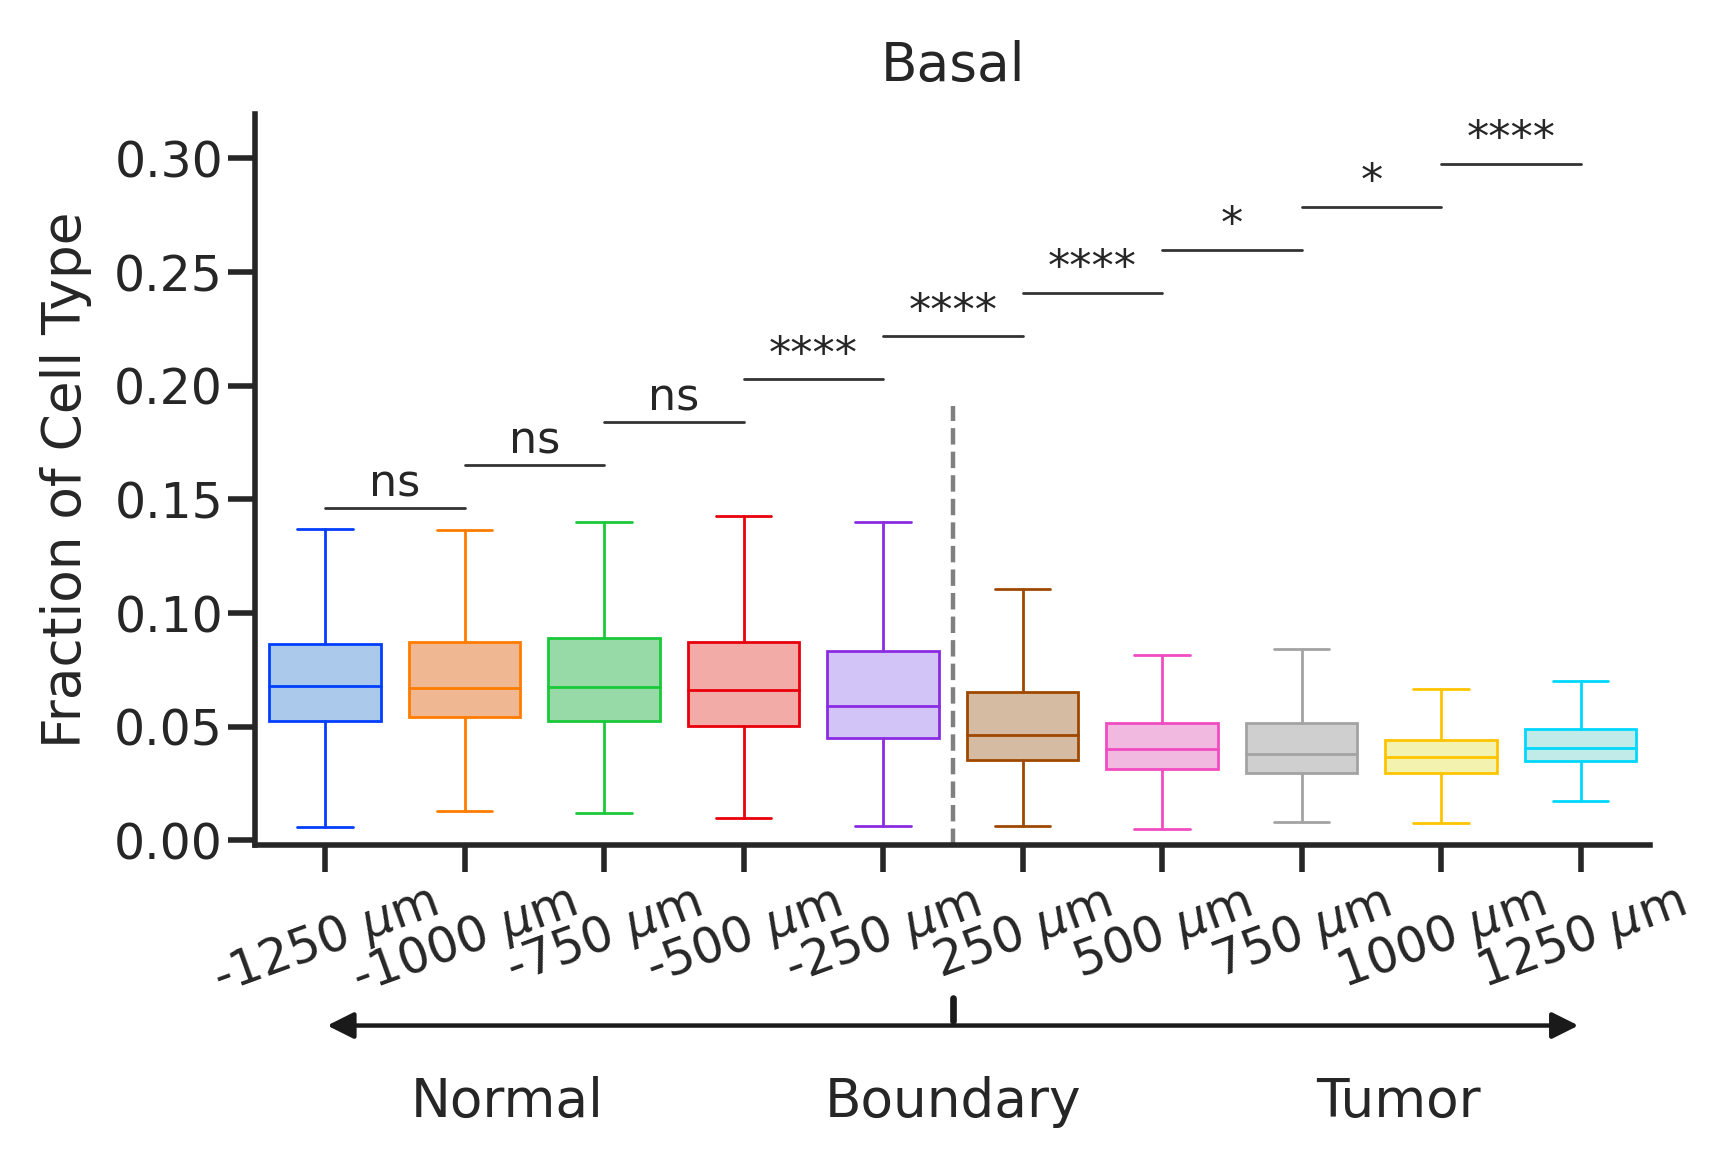

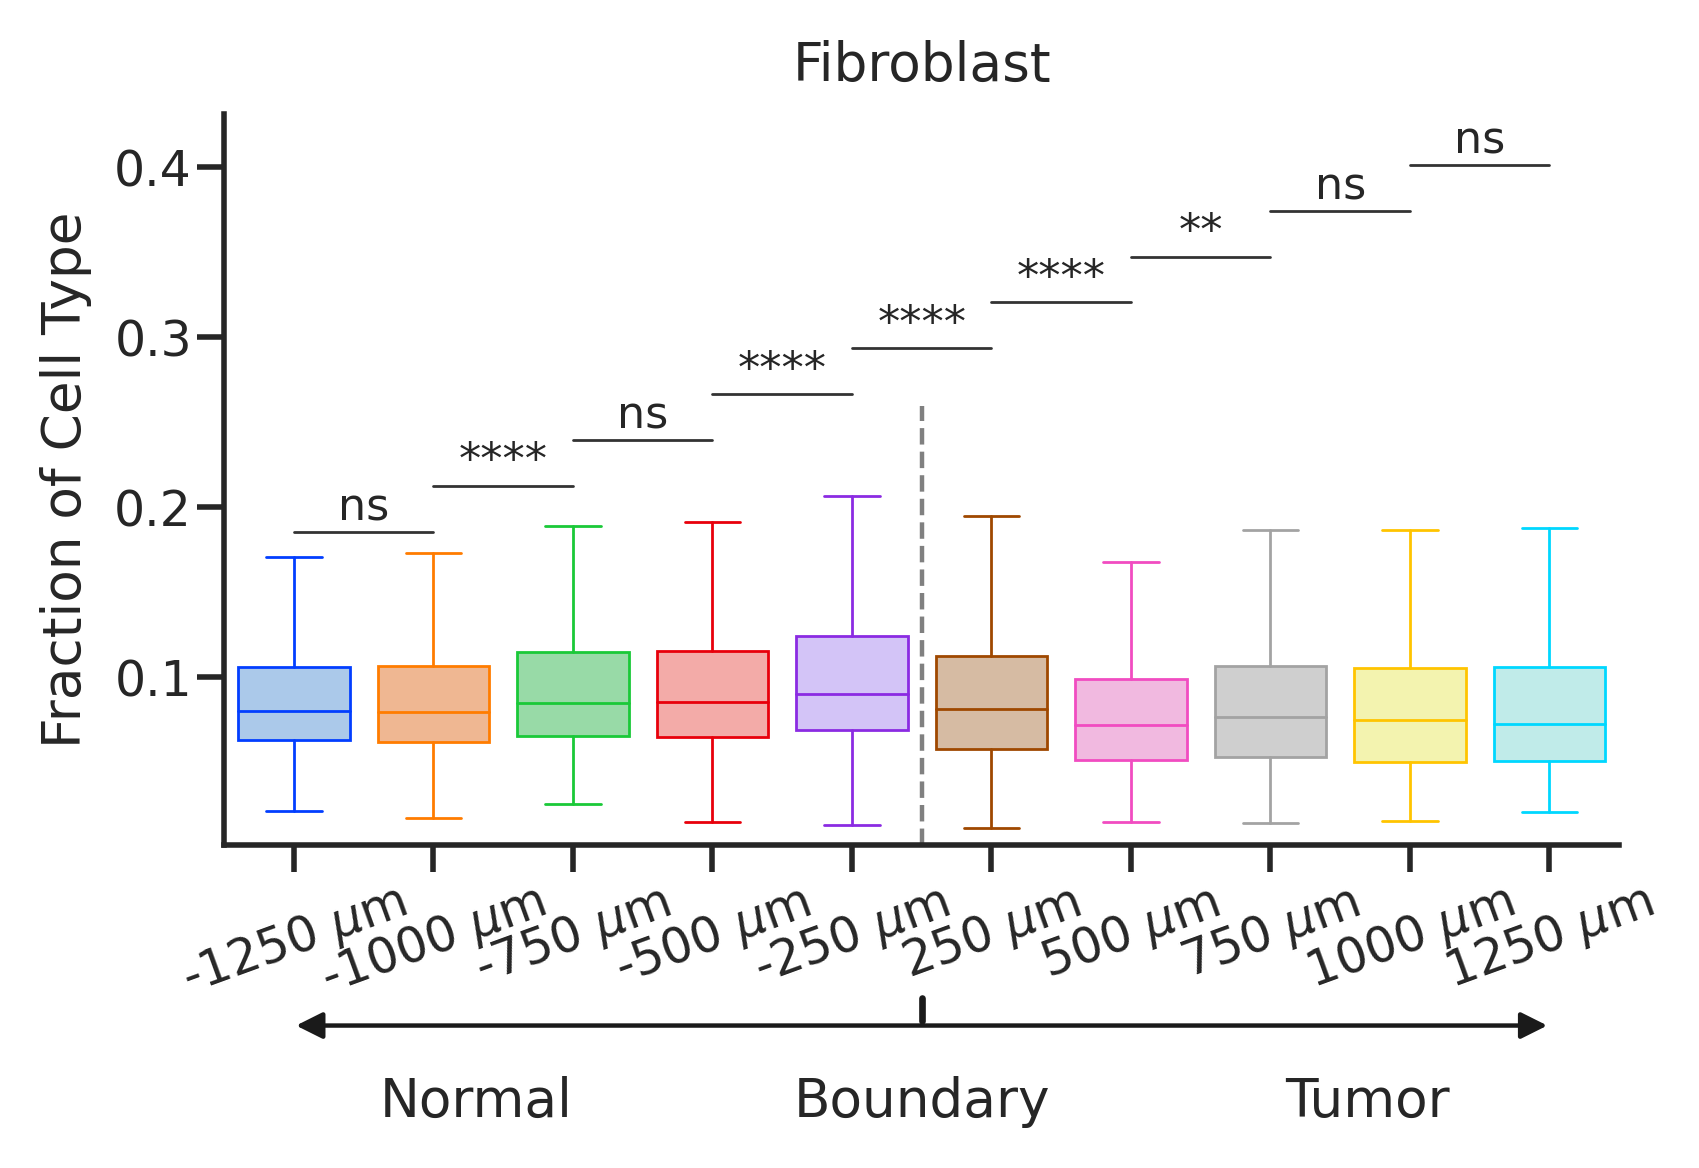

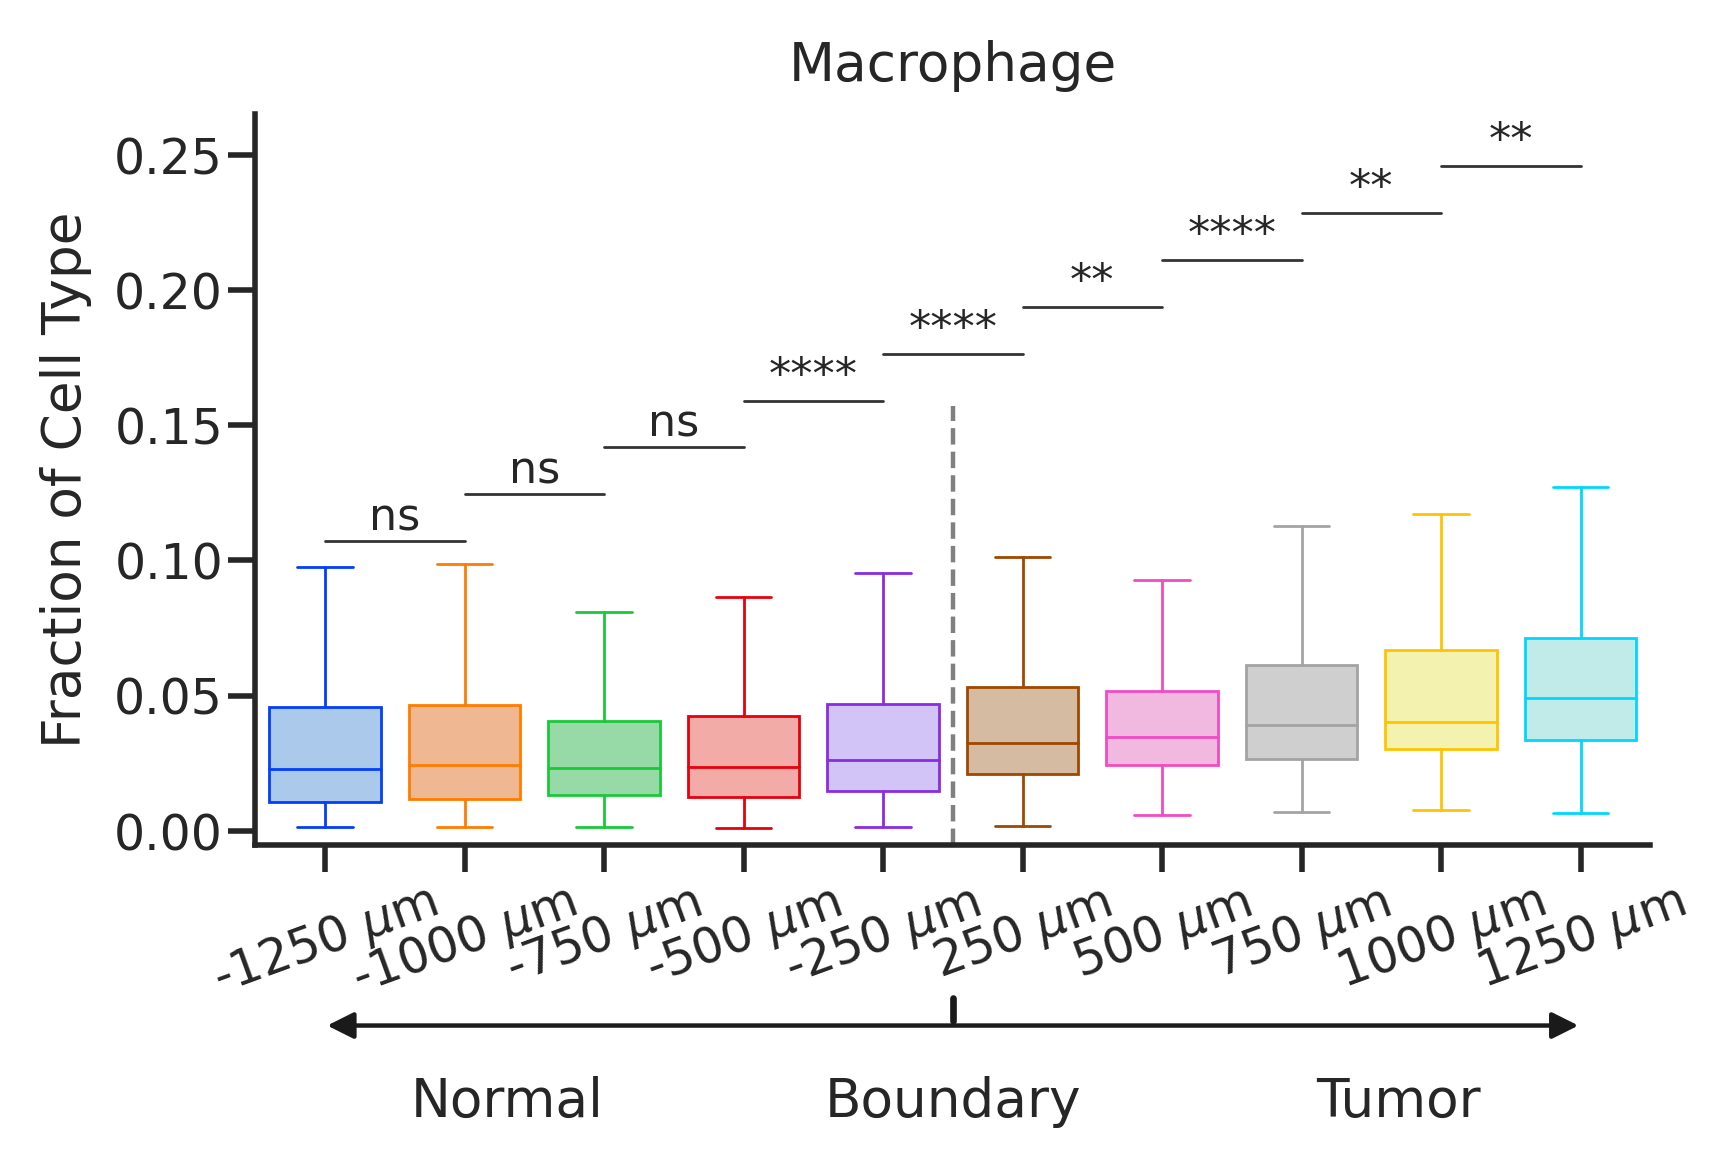

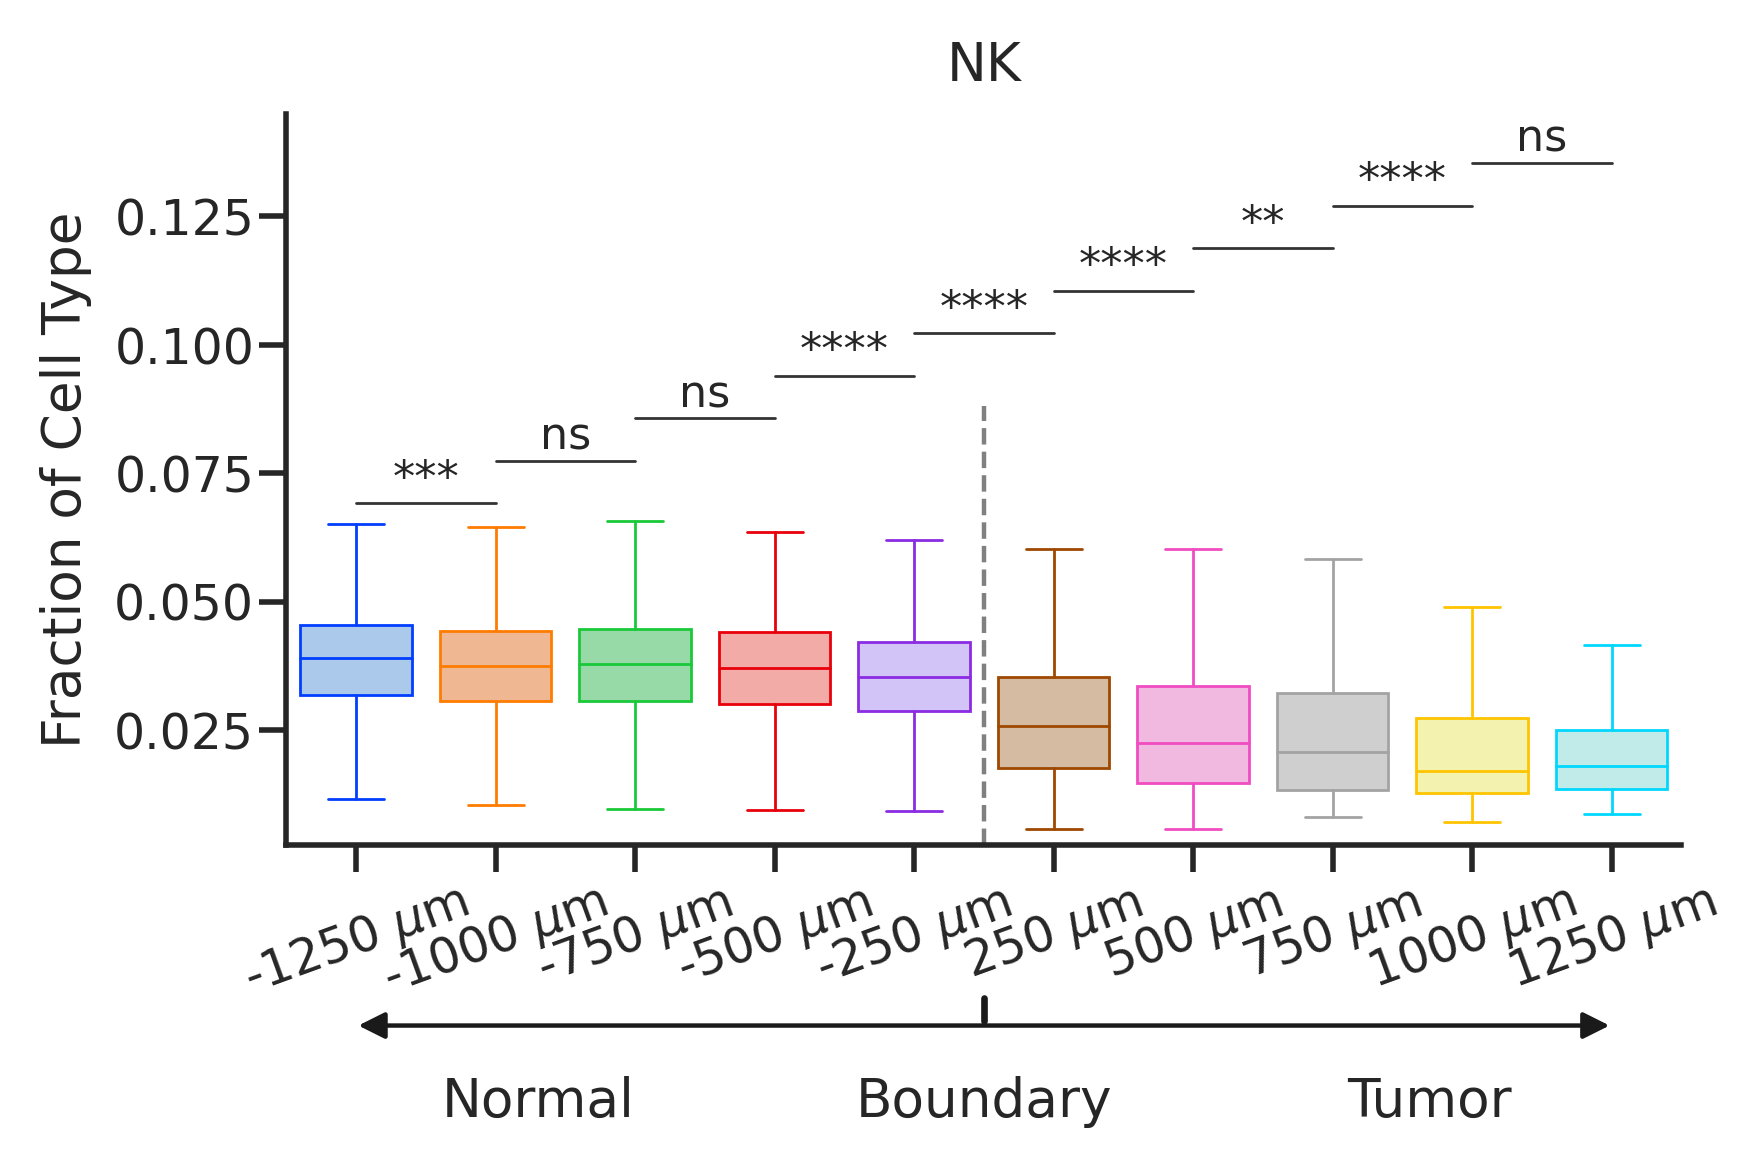

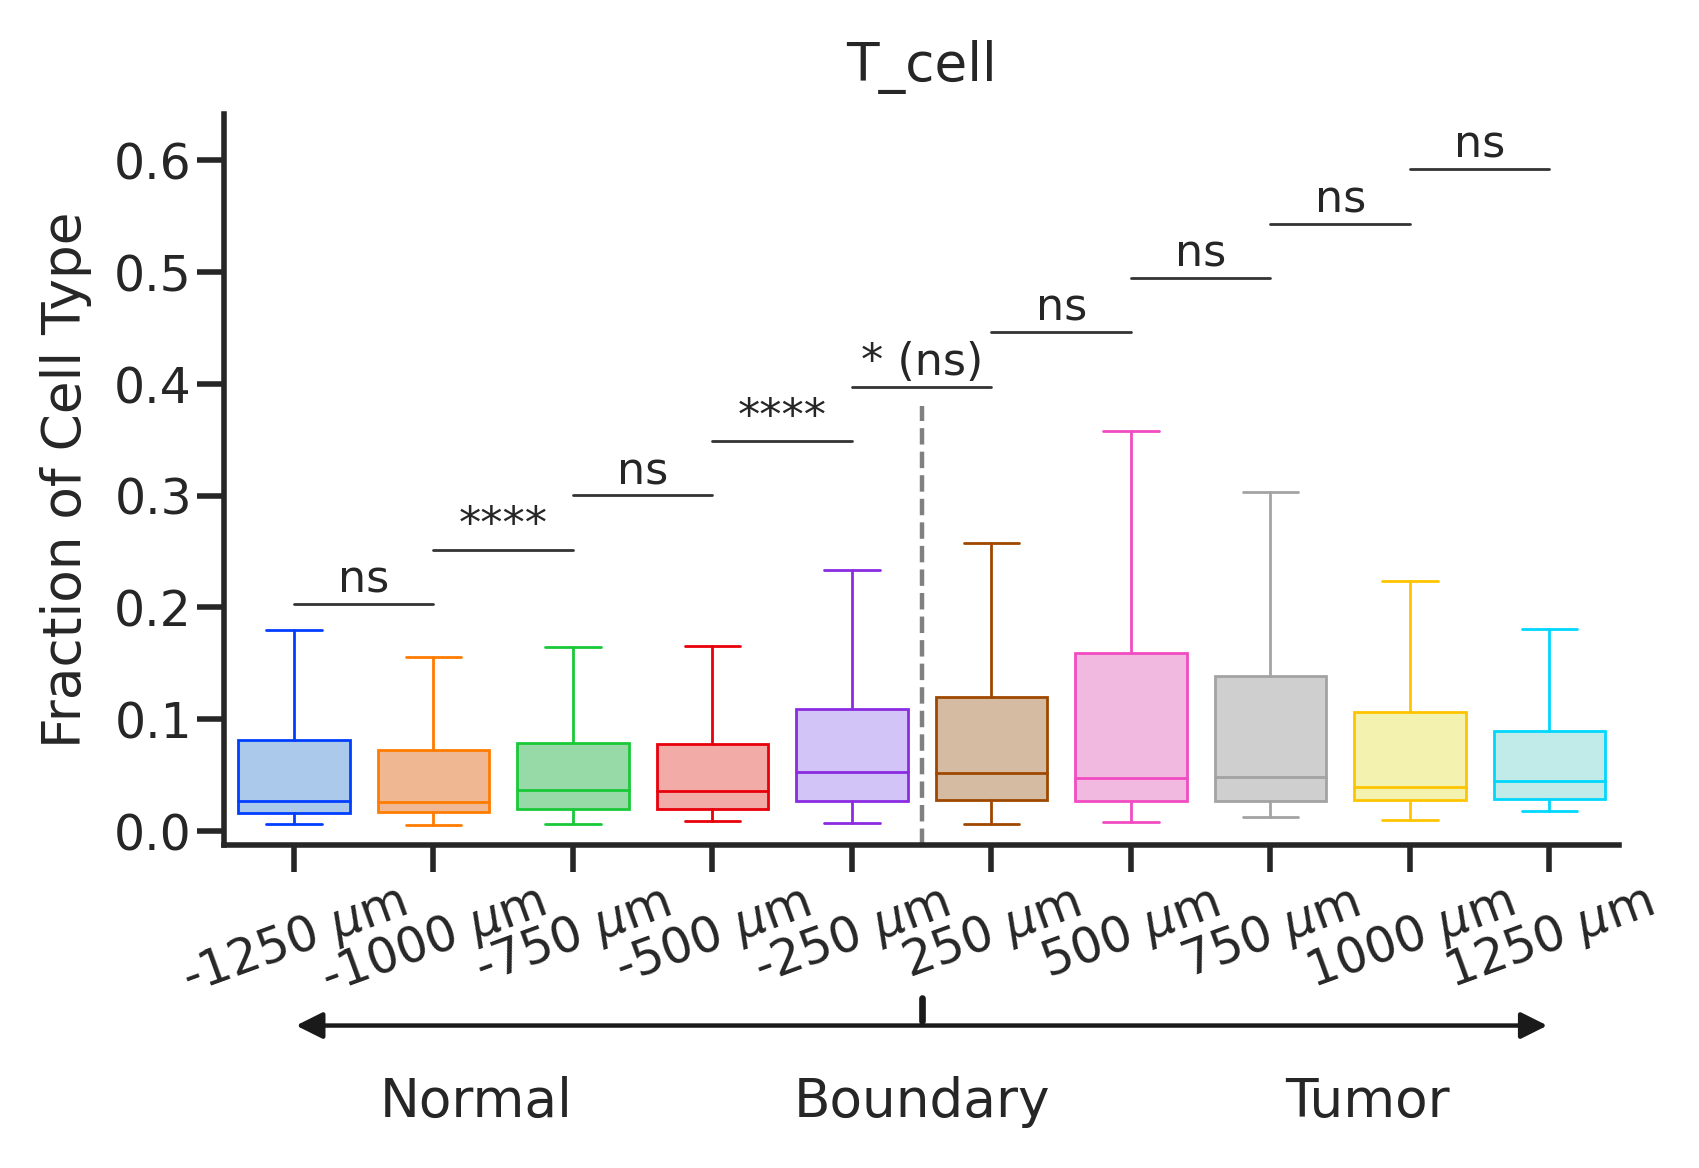

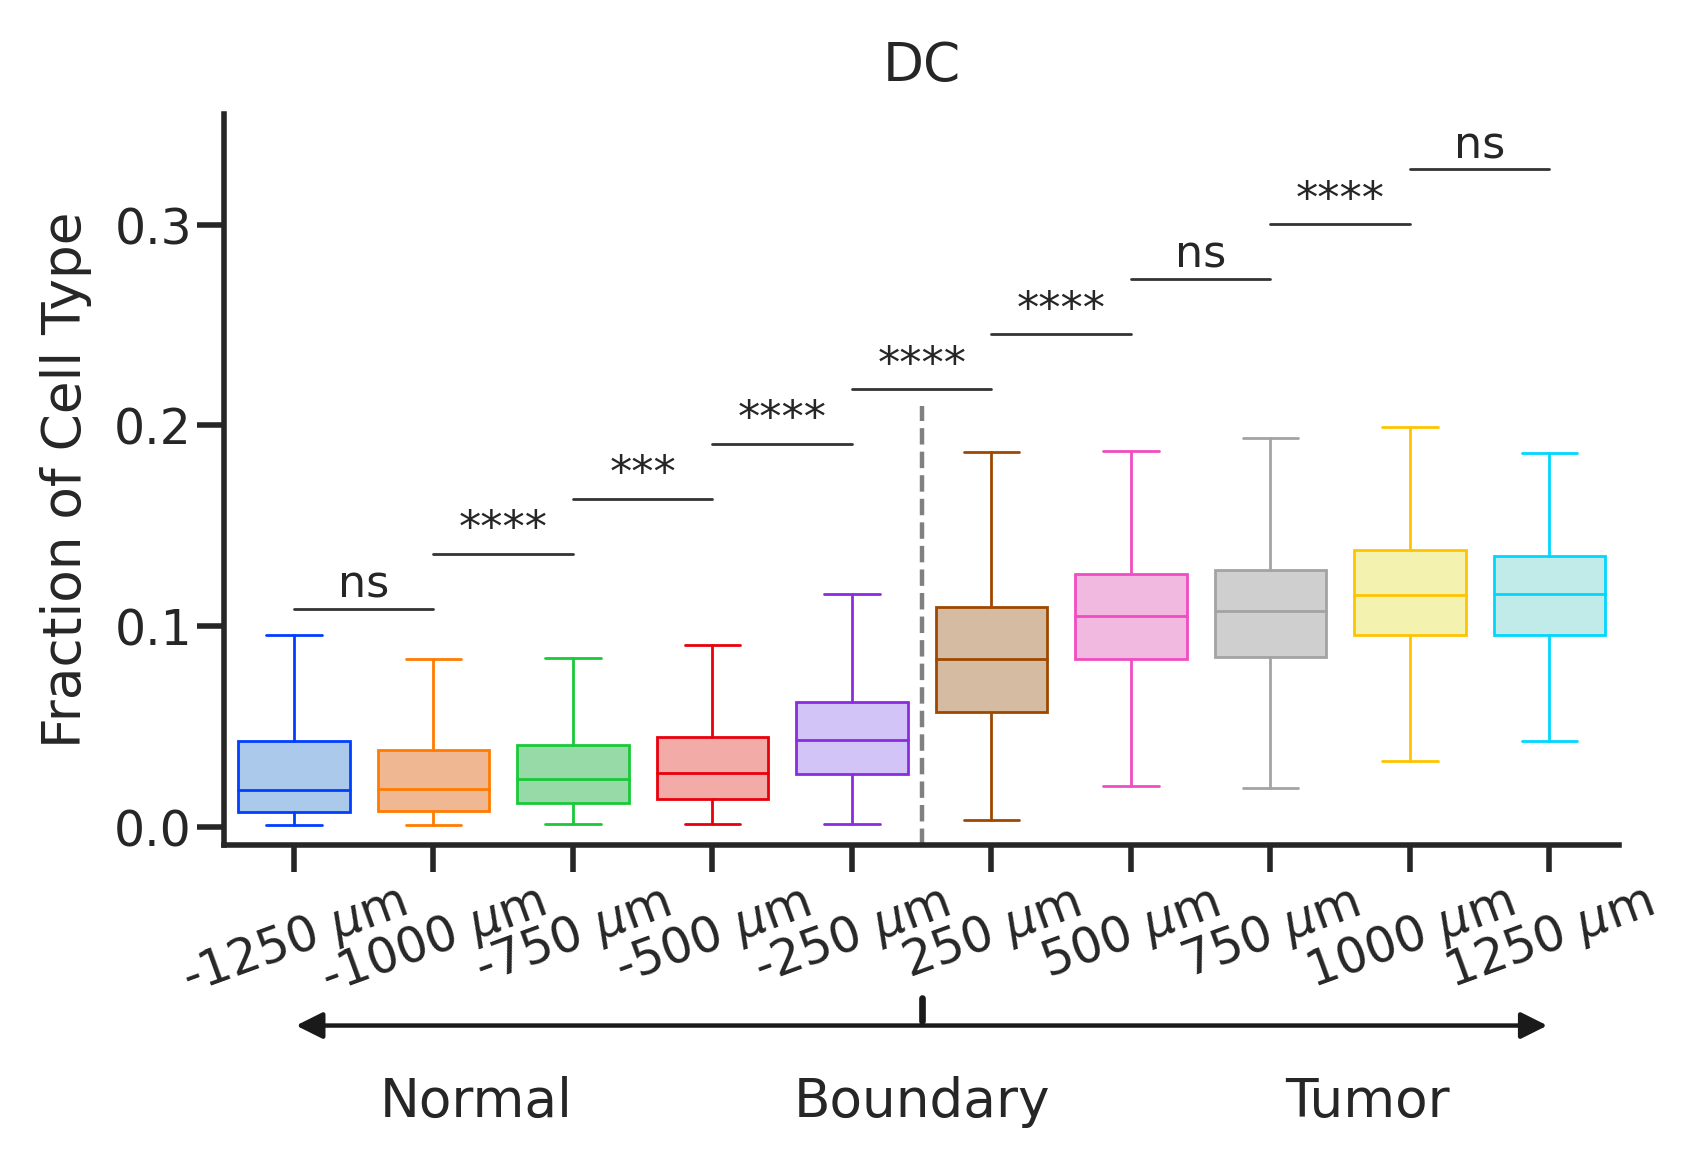

In [107]:
import matplotlib.font_manager # to solve: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
cells = ['AT2','AT2_like', 'B_cell', 'Basal', 'Fibroblast', 'Macrophage', 'NK', 'T_cell','DC']
for cc in cells:
    plot_show(df_cell_type_frac_regs,cc)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

20-25 vs. 15-20: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:8.756e-01 U_stat=1.192e+06
15-20 vs. 10-15: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.245e-03 U_stat=1.296e+06
10-15 vs. 5-10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.164e-02 U_stat=1.422e+06
5-10 vs. 0-5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.777e-55 U_stat=2.848e+06
0-5 vs. -5-0: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.054e-94 U_stat=3.926e+06
-5-0 vs. -10--5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.028e-08 U_stat=1.813e+06
-10--5 vs. -15--10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correct

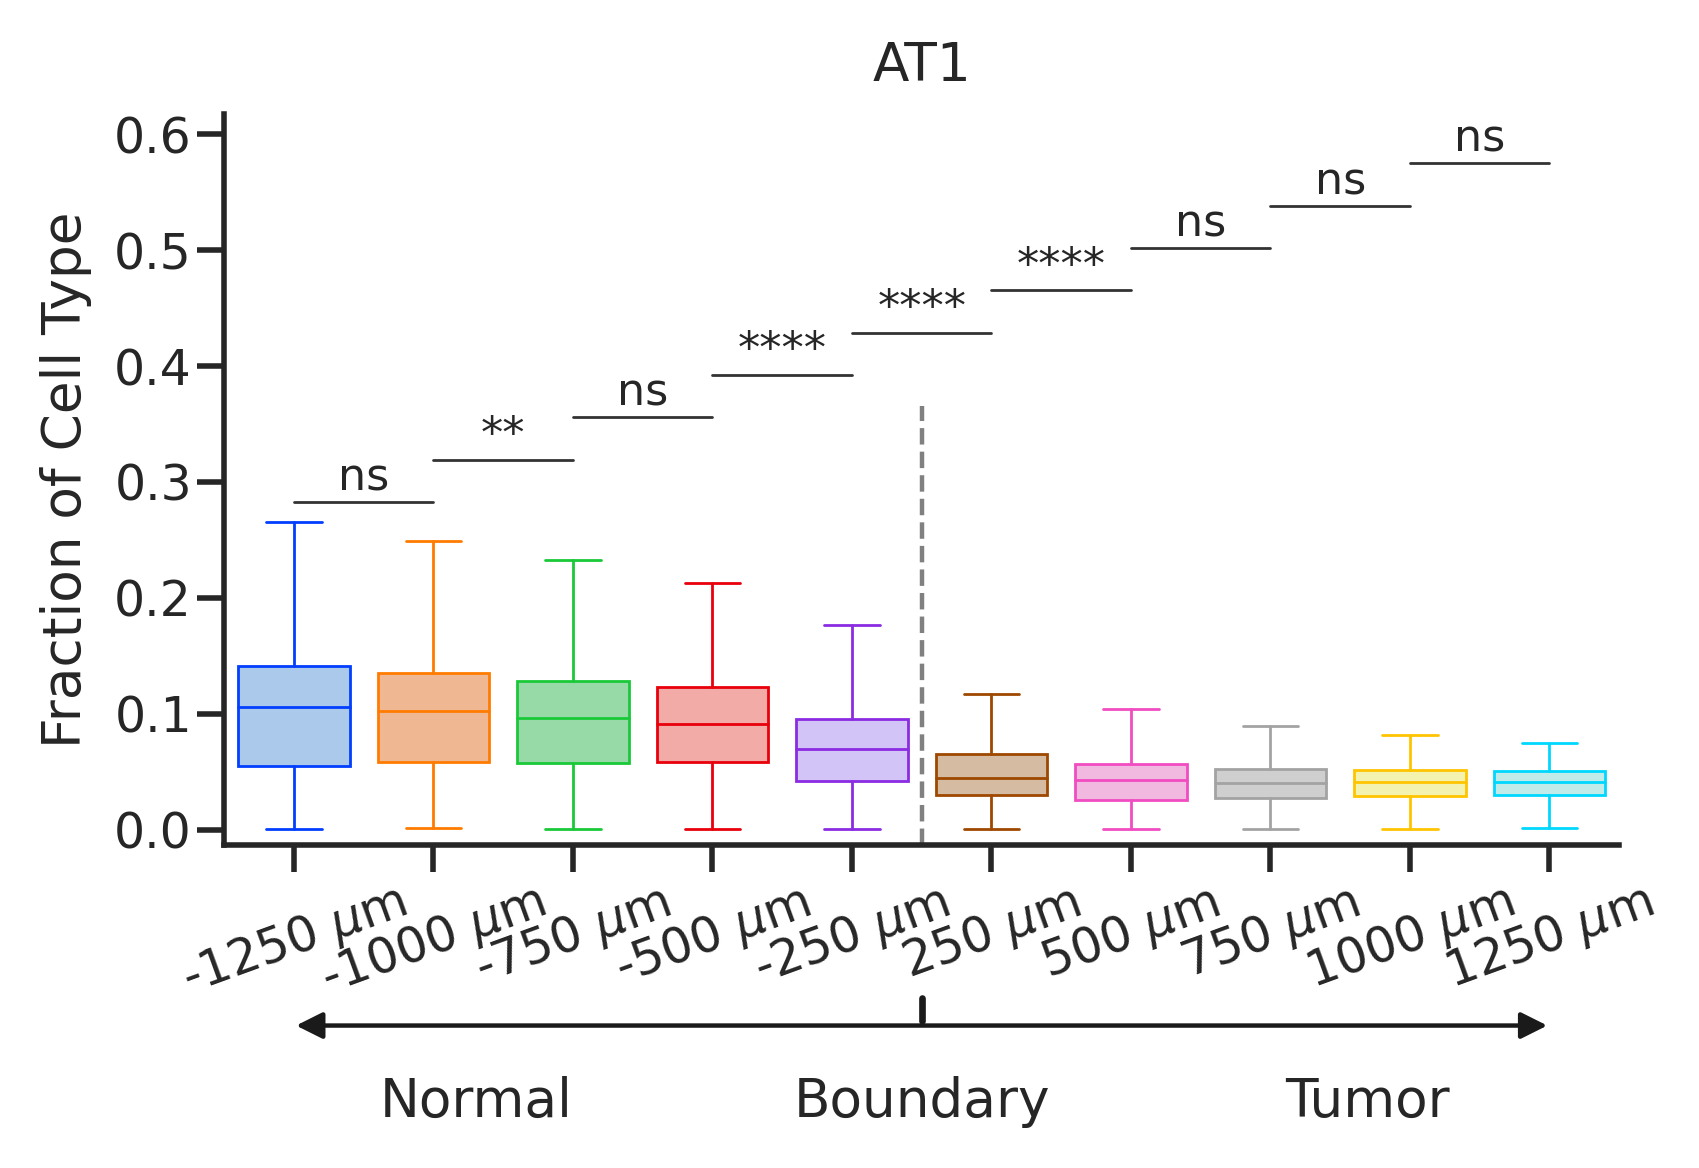

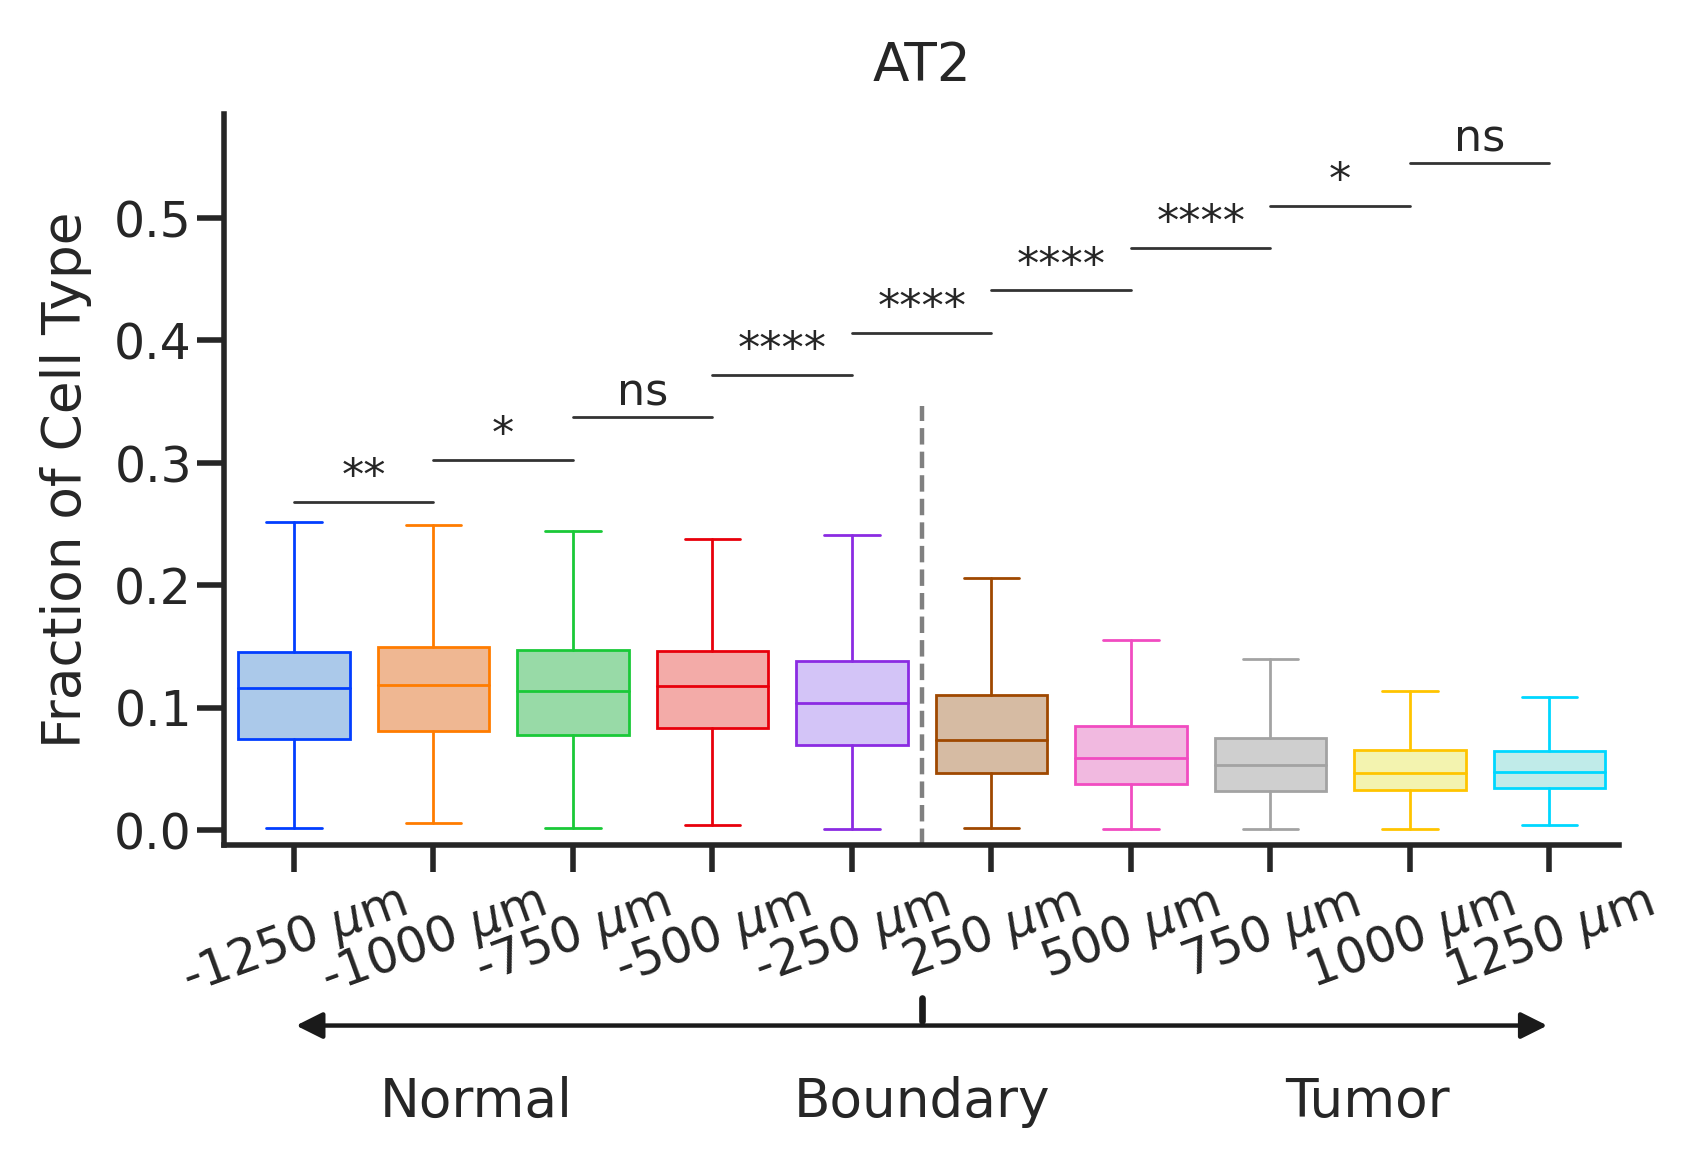

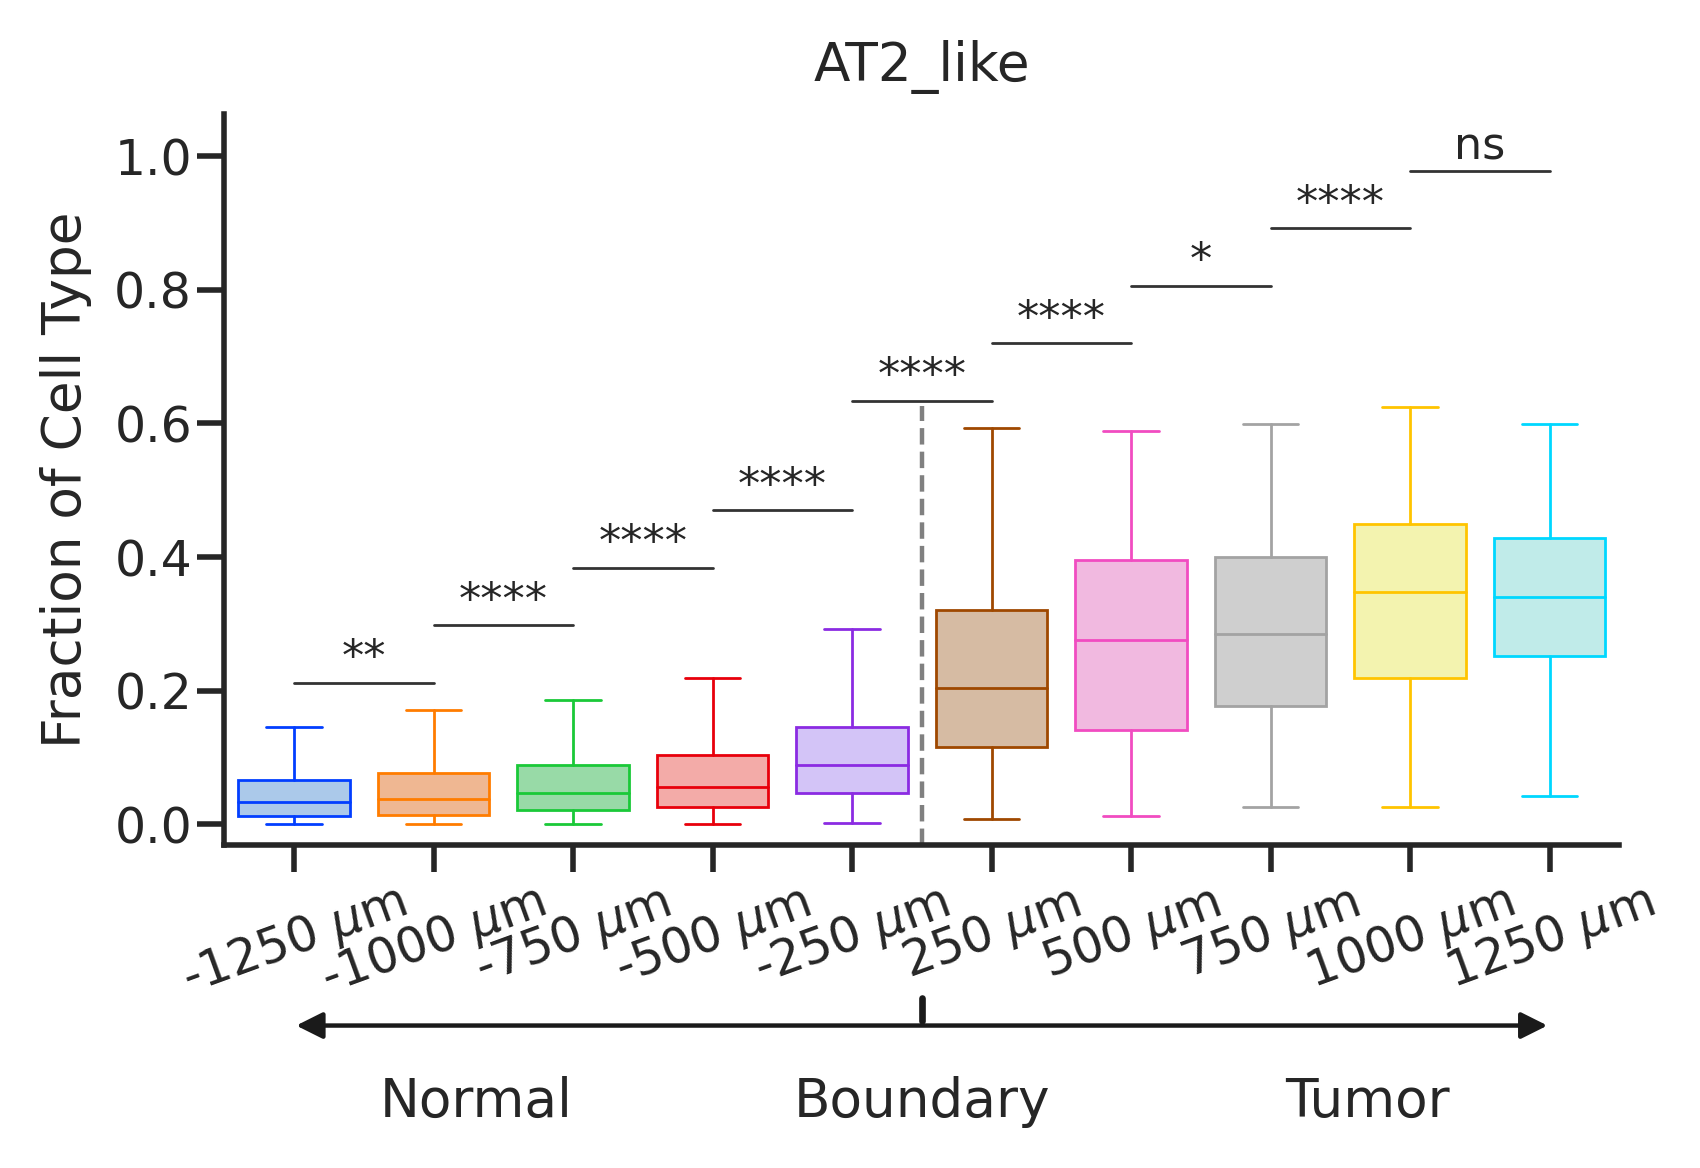

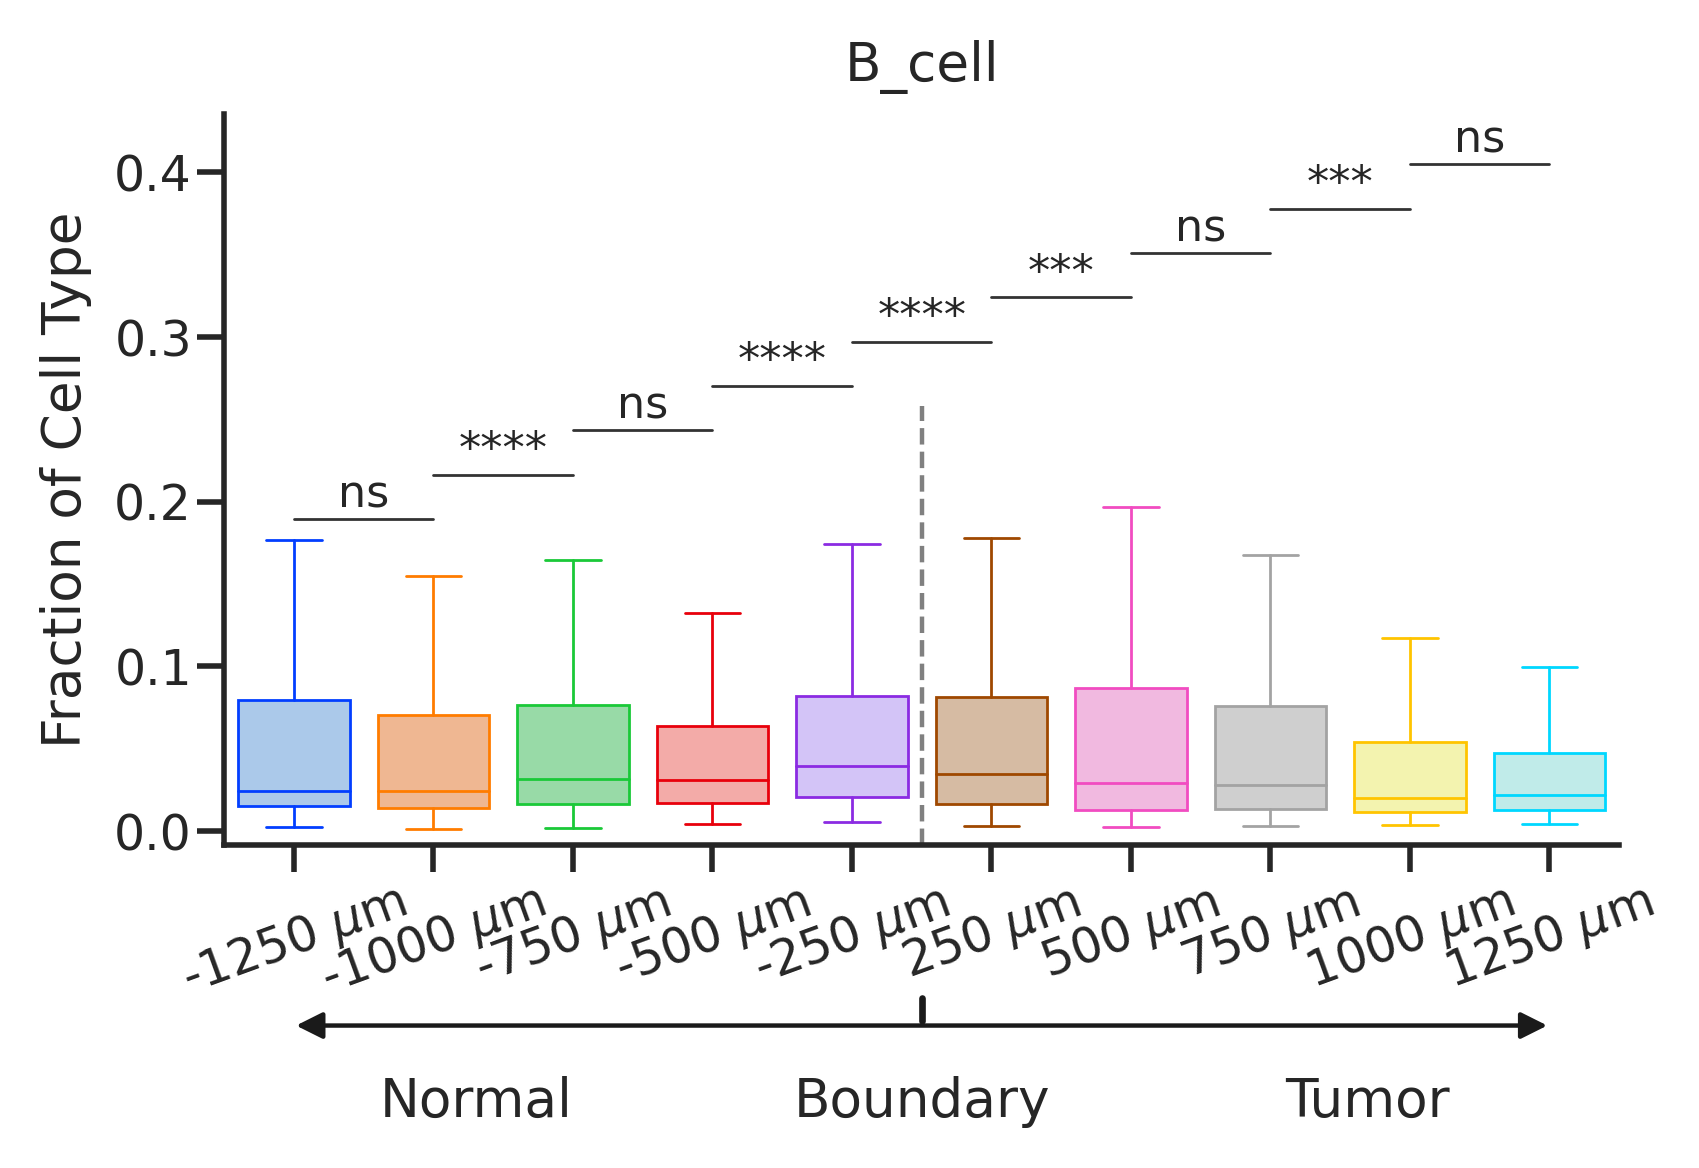

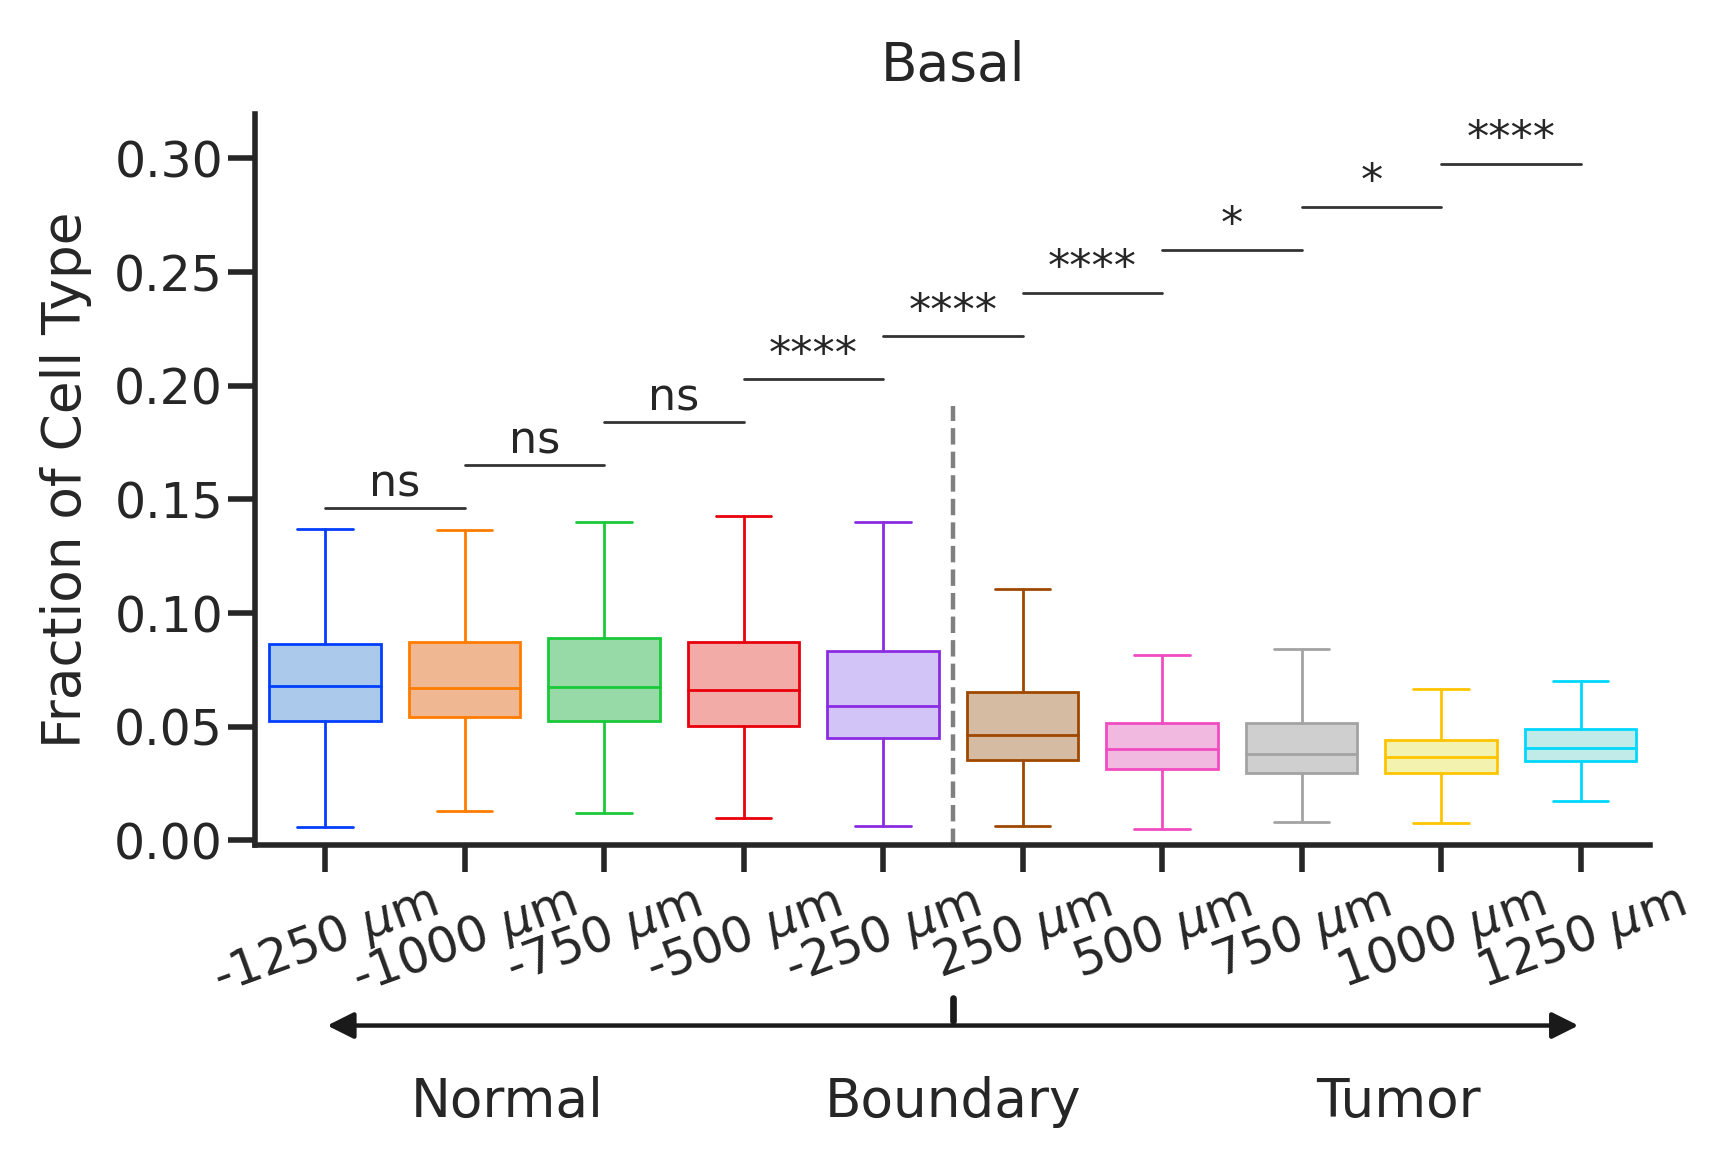

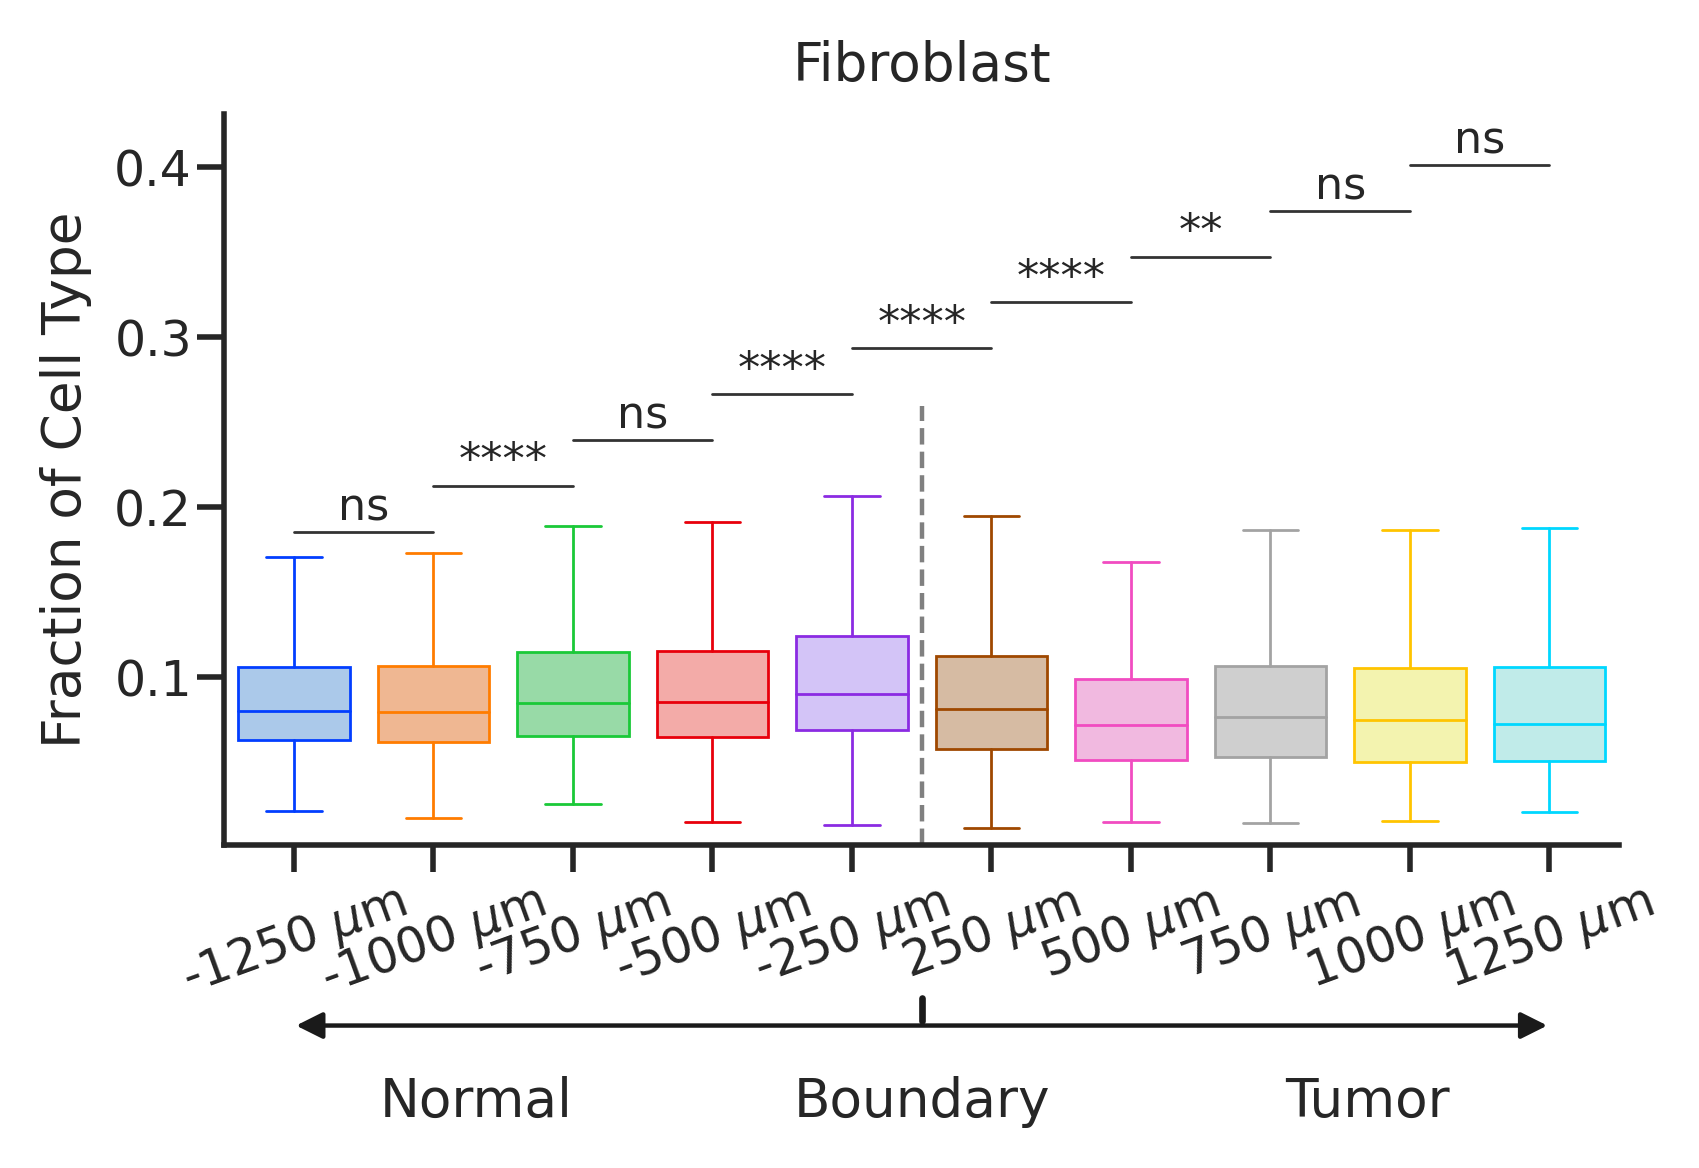

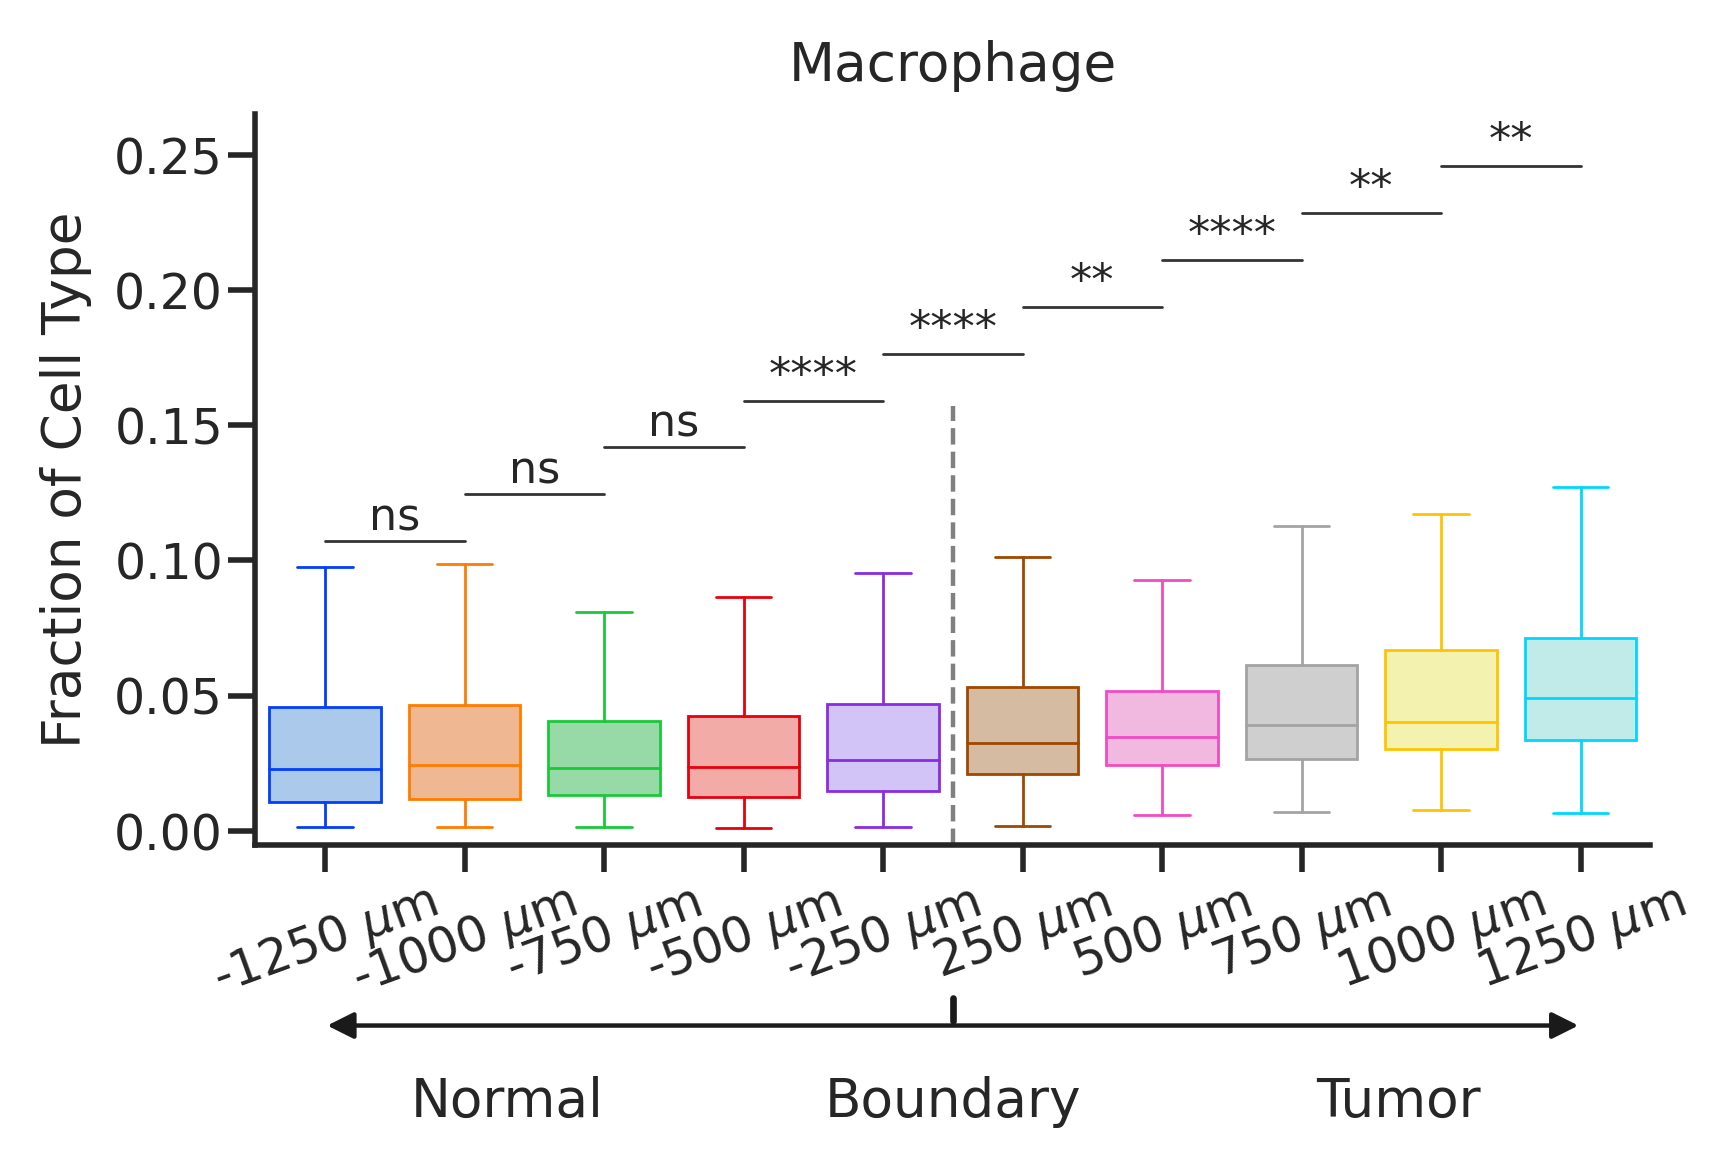

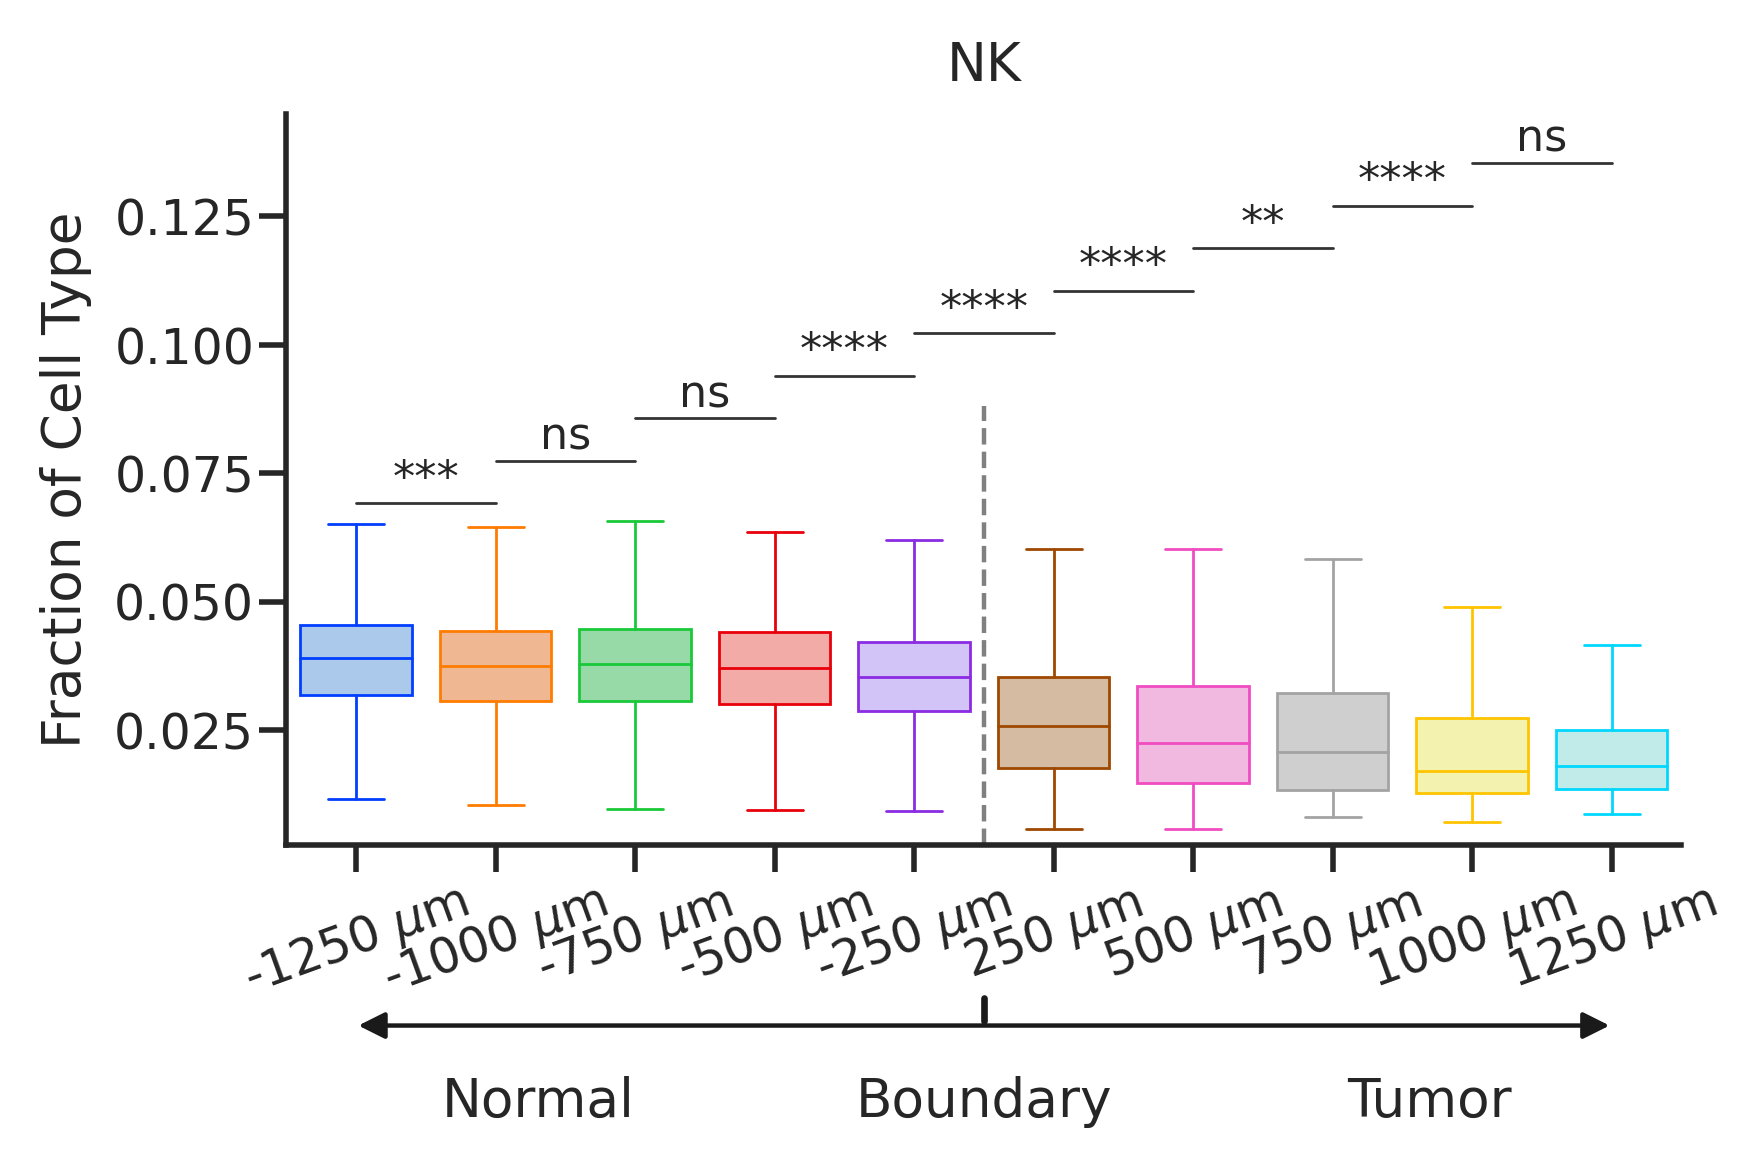

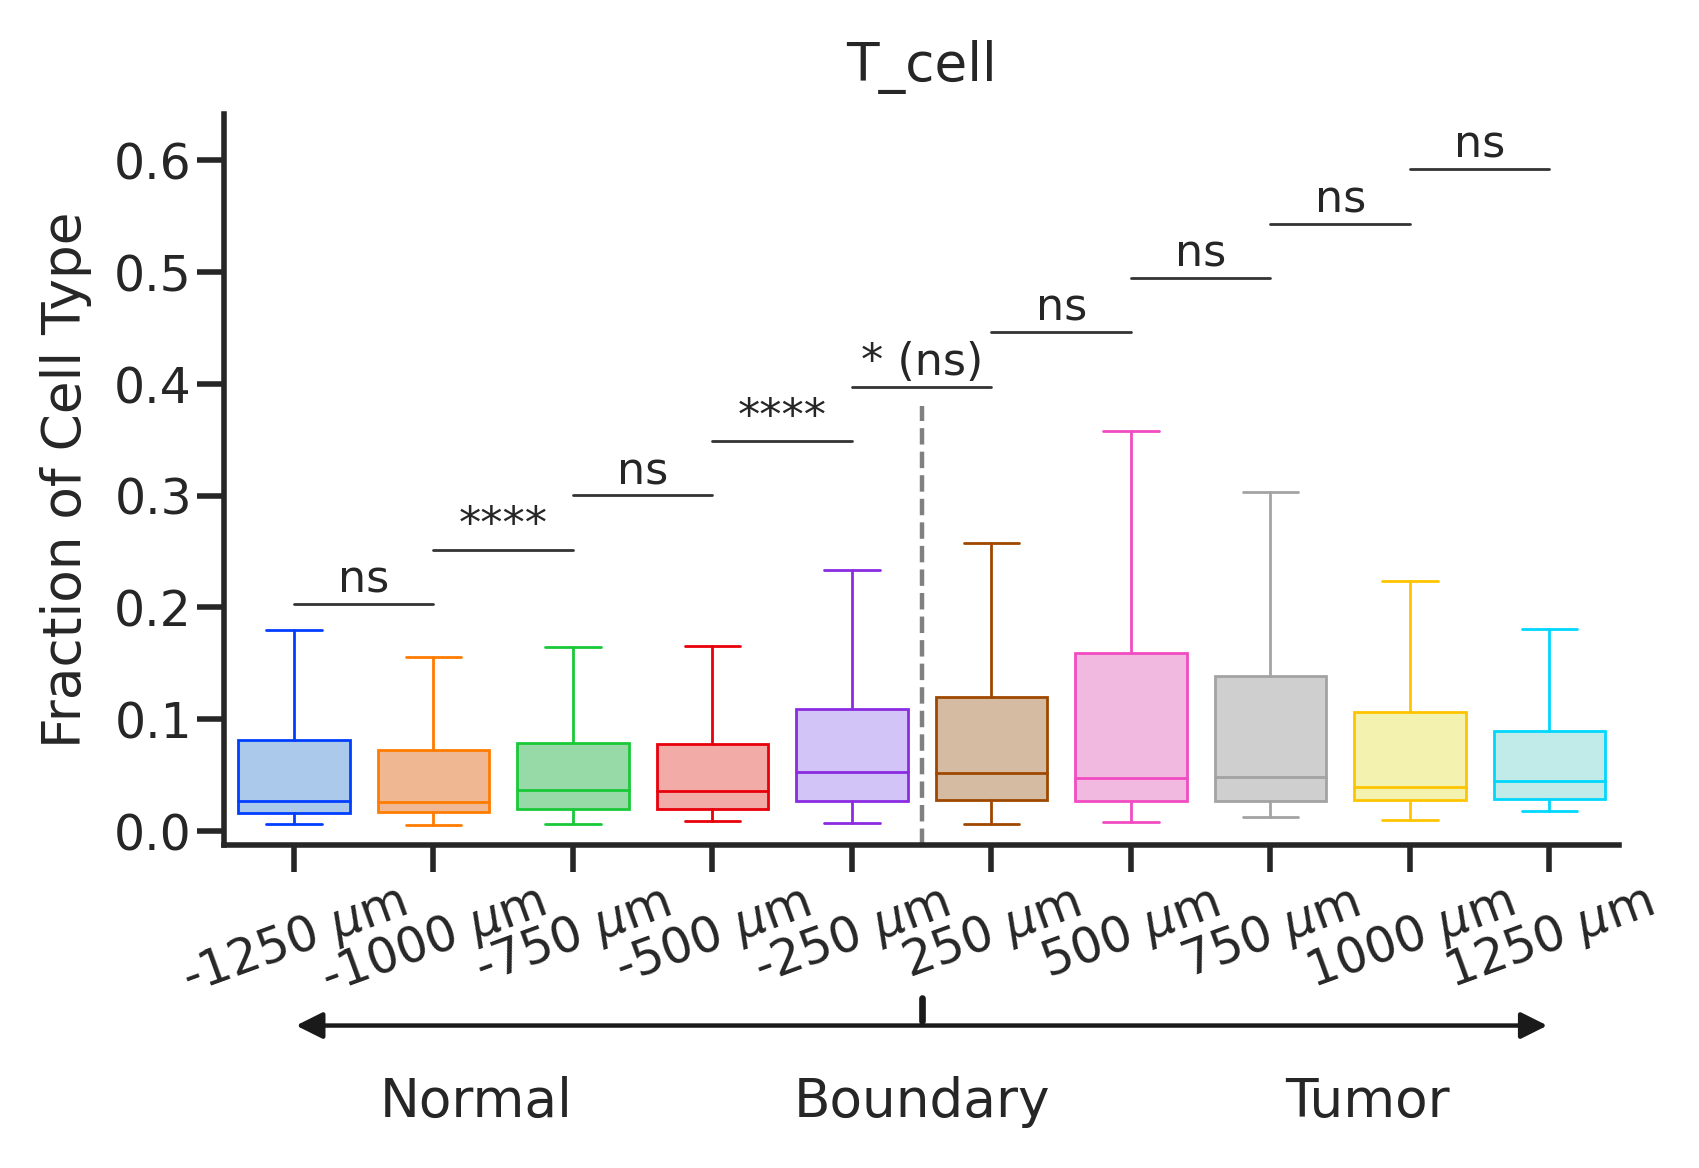

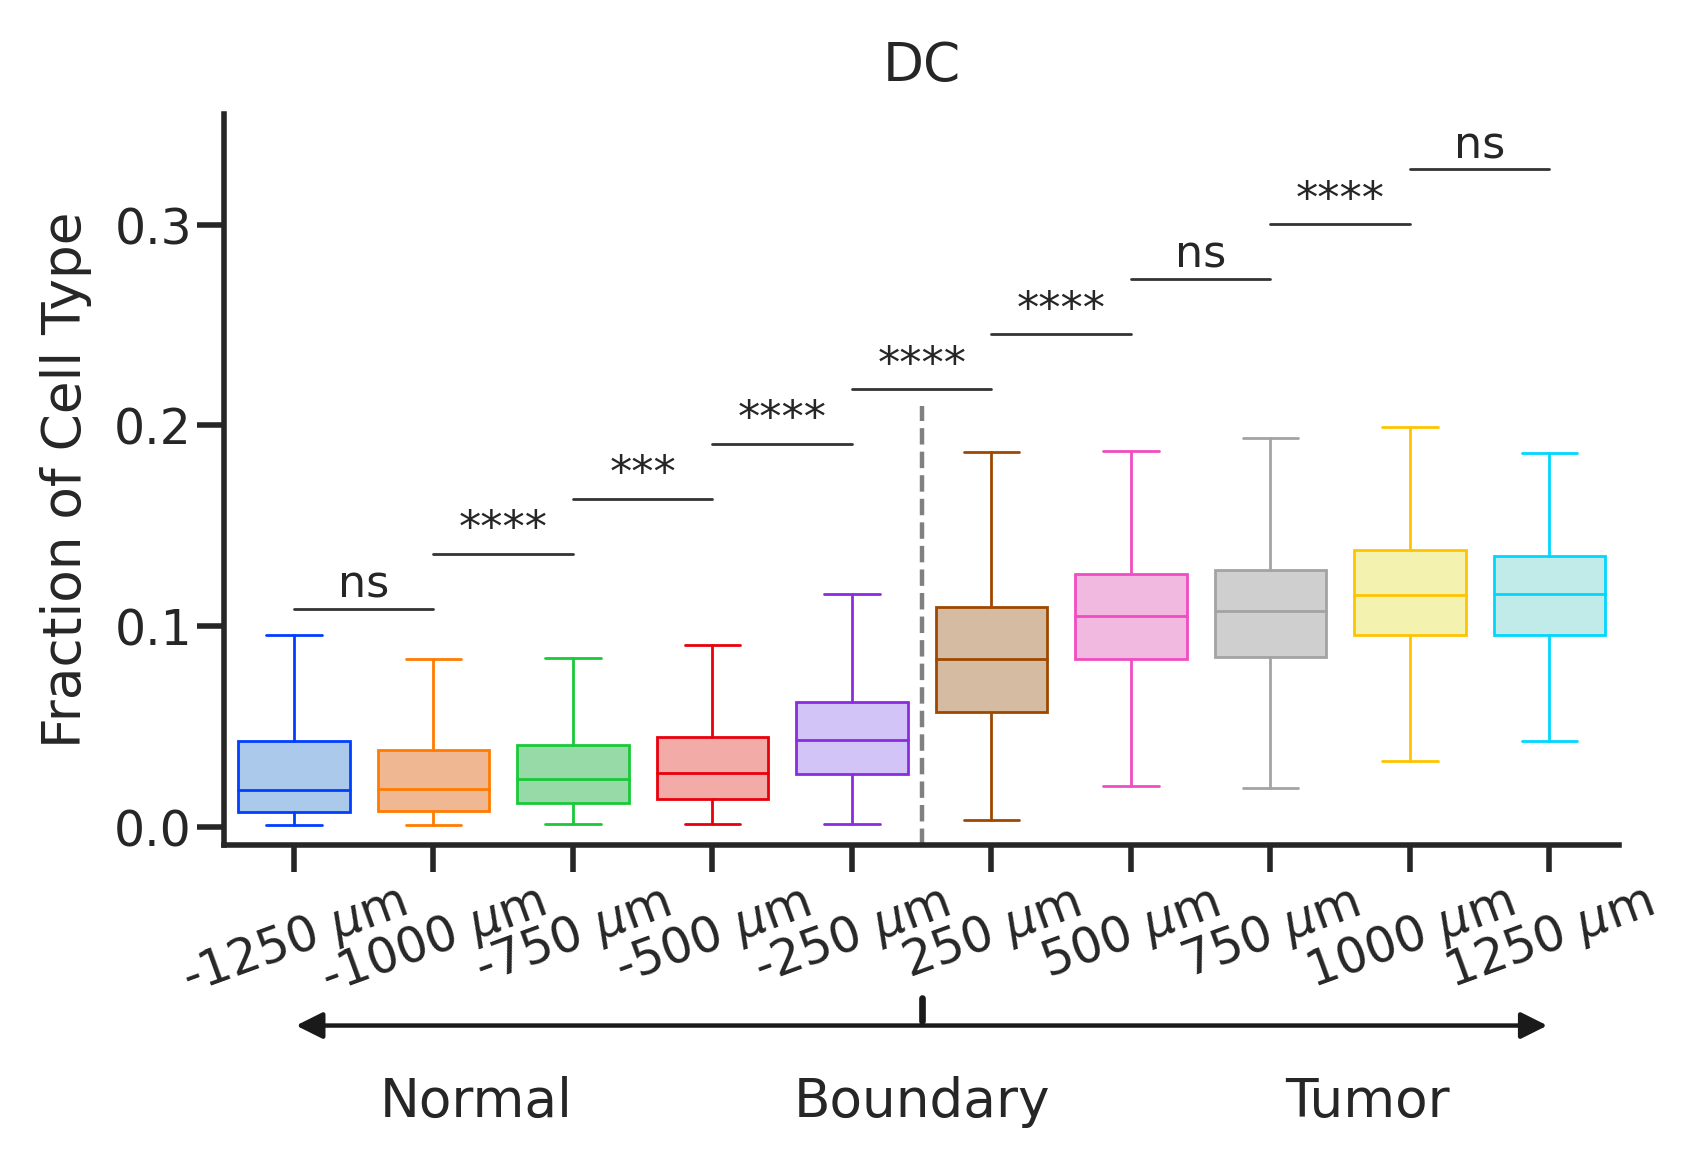

In [35]:
import matplotlib.font_manager # to solve: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
cells = ['AT2','AT2_like', 'B_cell', 'Basal', 'Fibroblast', 'Macrophage', 'NK', 'T_cell','DC']
for cc in cells:
    plot_show(df_cell_type_frac_regs,cc)

# Genes

In [37]:
celltype_list = ['AT1', 'AT2', 'AT2_like', 'B_cell', 'Basal', 'Ciliated', 'Club', 'DC', 
                 'Endothelial', 'Erythrocyte', 'Fibroblast', 'Granulocyte', 'MAST_cell', 'Macrophage', 'NK', 'T_cell']

gene_dict = {'DC': ['LYZ','HLA-DRB1','IL1B','LST1','HLA-DQA1','HLA-DQB1'],
            'Fibroblast':['LUM','DCN','FBLN1','APOD','COL1A1','IGFBP6','CFD'],
            'Macrophage':['CD68','MARCO','CTSD','C1QA','C1QB','APOC1','APOE'],
            'NK':['NKG7','GZMA','GNLY','CD3G','FGFBP2'],
            'T_cell':['CD2','CD3D','CD3E','CXCR4','IL32'],
             'B_cell':['MS4A1','FKBP11', 'DERL3','CD79A','MZB1','IGHA2'], # no 'IGLL5','IGJ' in data
            'Club':['SCGB1A1','SCGB3A1','PIGR','WFDC2'],
            'Ciliated':['CAPS','TPPP3','C9orf24'],
            'Endothelial':['RAMP2','VWF','GNG11','CLDNS','DARC'],
             'AT1':['RTKN2','EMP2'],
             'AT2':['PIGR', 'WFDC2','SFTA2','NAPSA','SFTPB','SFTPD','SFTPA1','SFTPC'],
             'AT2_like': ['MDK','TIMP1','IFI27','EPCAM','SCGB3A2'],
             'Basal':['KRT15','S100A2'], # no MIR205HG 
             'Erythrocyte':['HBA1','HBA2','HBB'],
             'Granulocyte':['G0S2','S100A8','S100A9'],
             'MAST_cell':['RGS13','HPGDS','CAP3','TPSAB1'],
            }

In [52]:
adass = [adata_p5_ob.copy(), adata_p10_p5.copy(), adata_p15_p10.copy(), 
         adata_p20_p15.copy(), adata_m5_ob.copy(), adata_m10_m5.copy(), adata_m15_m10.copy(), adata_m20_m15.copy()]
dist_lab = ['0-5','5-10','10-15','15-20', '-5-0', '-10--5','-15--10','-20--15']

celltype_list = ['AT2_like', 'B_cell', 'Basal', 'Fibroblast', 'Macrophage', 'NK', 'T_cell']

celltype = 'T_cell'
df_gene=None
for i, ada in enumerate(adass):
    i_df_gene = ada[:, gene_dict[celltype]].to_df()
    i_df_gene['region'] = [dist_lab[i]] * i_df_gene.shape[0]
        
    if i==0:
        df_gene = i_df_gene
    else:
        df_gene = pd.concat([df_gene, i_df_gene], ignore_index=True)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

15-20 vs. 10-15: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.400e-04 U_stat=1.172e+06
10-15 vs. 5-10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.521e-01 U_stat=1.353e+06
5-10 vs. 0-5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.720e-02 U_stat=2.169e+06
0-5 vs. -5-0: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.668e-03 U_stat=2.836e+06
-5-0 vs. -10--5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.511e-04 U_stat=1.547e+06
-10--5 vs. -15--10: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.197e-02 U_stat=5.206e+05
-15--10 vs. -20--15: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg cor

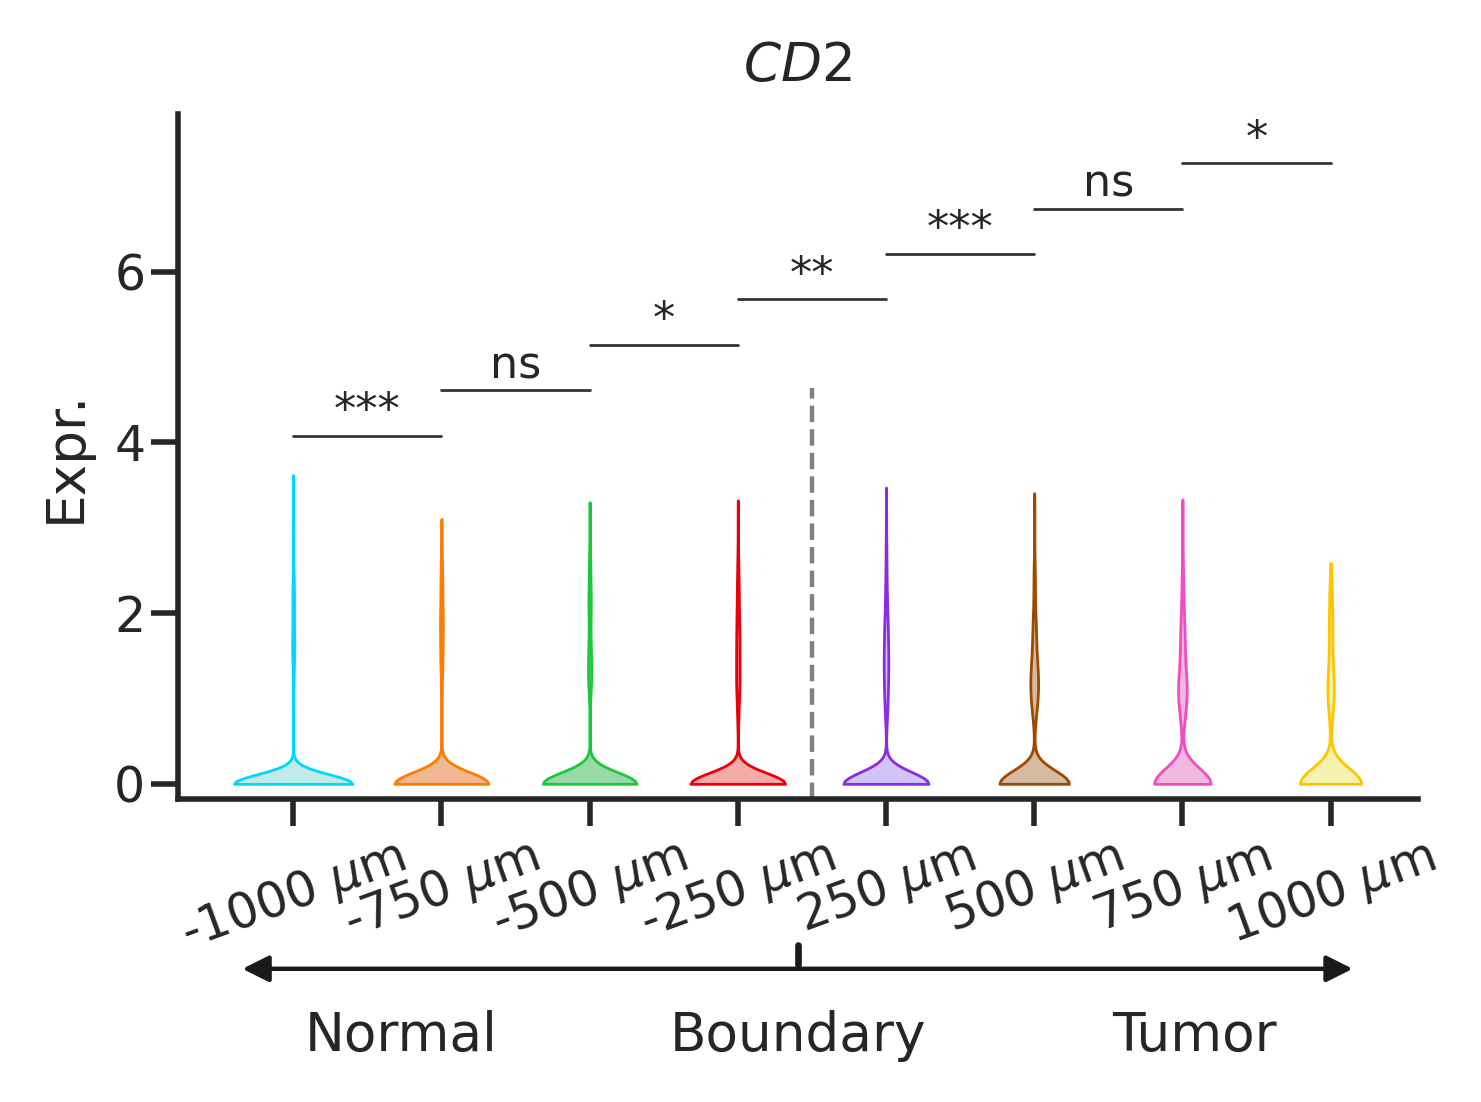

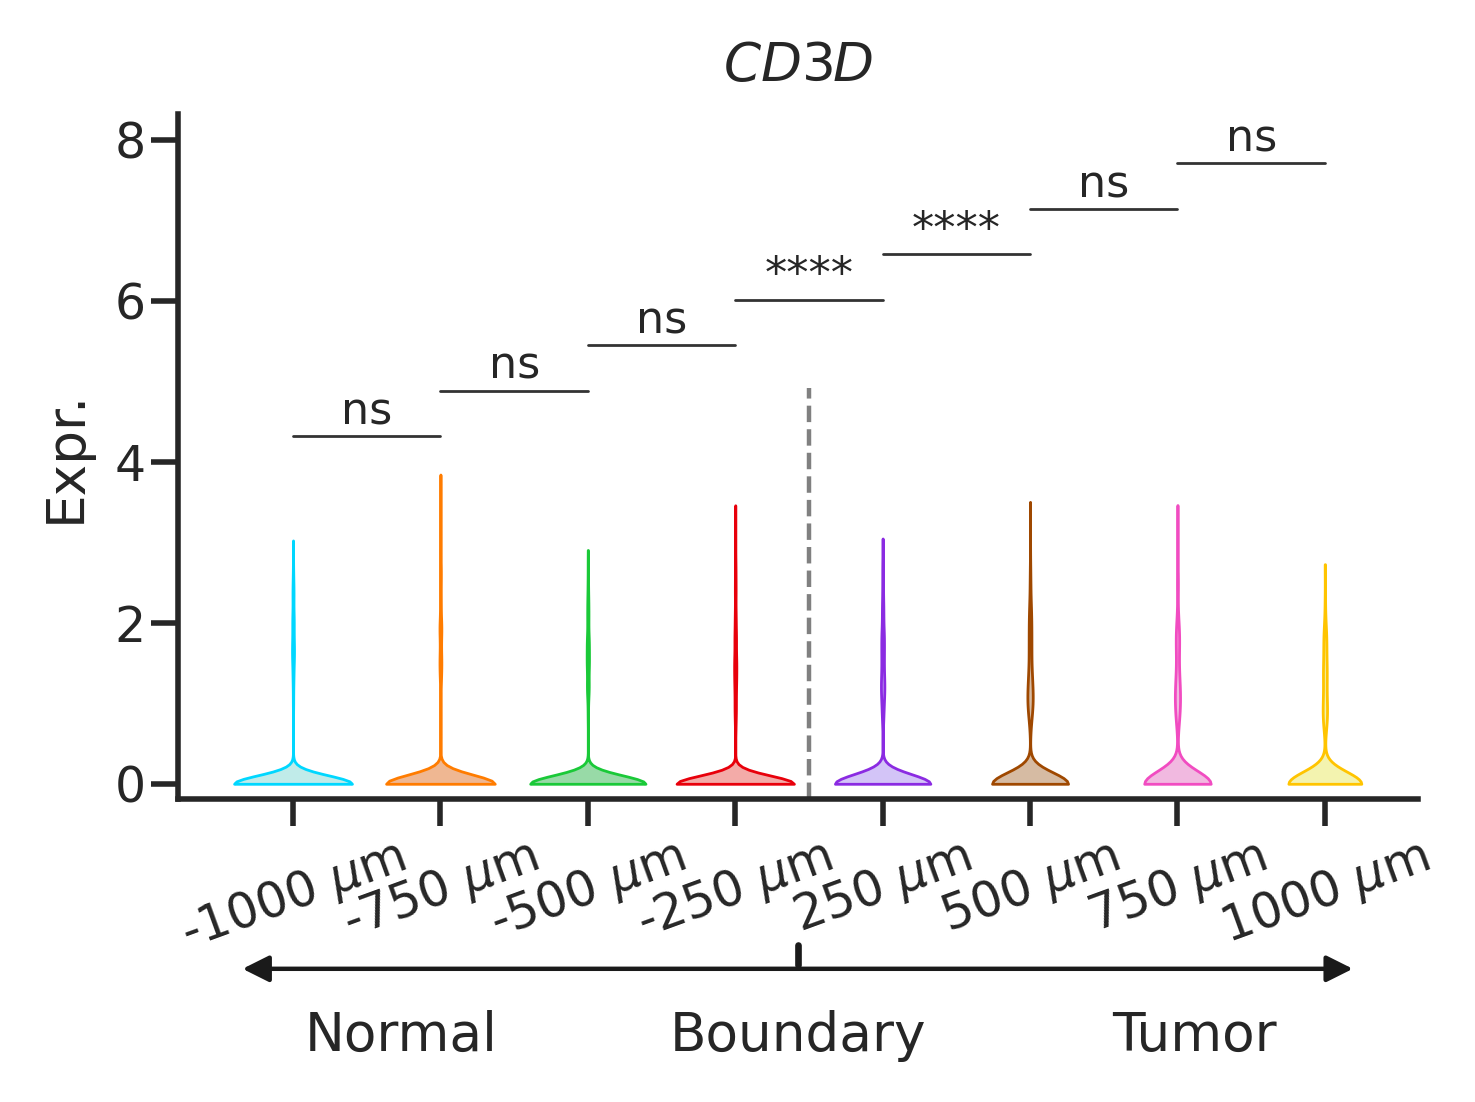

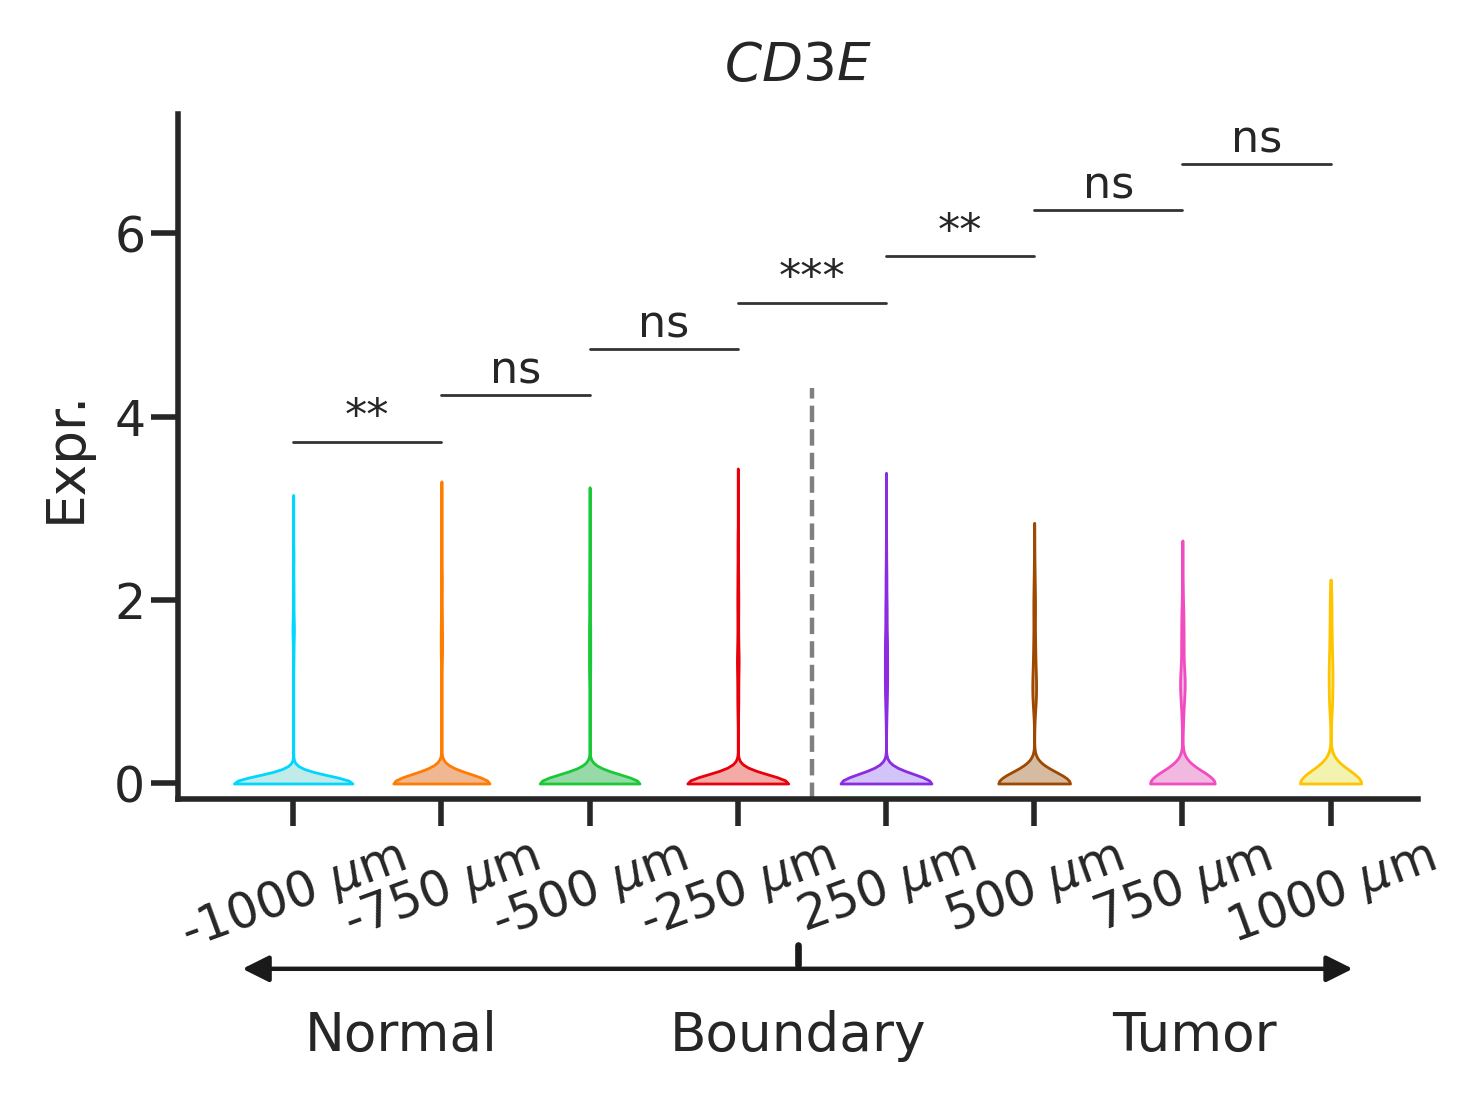

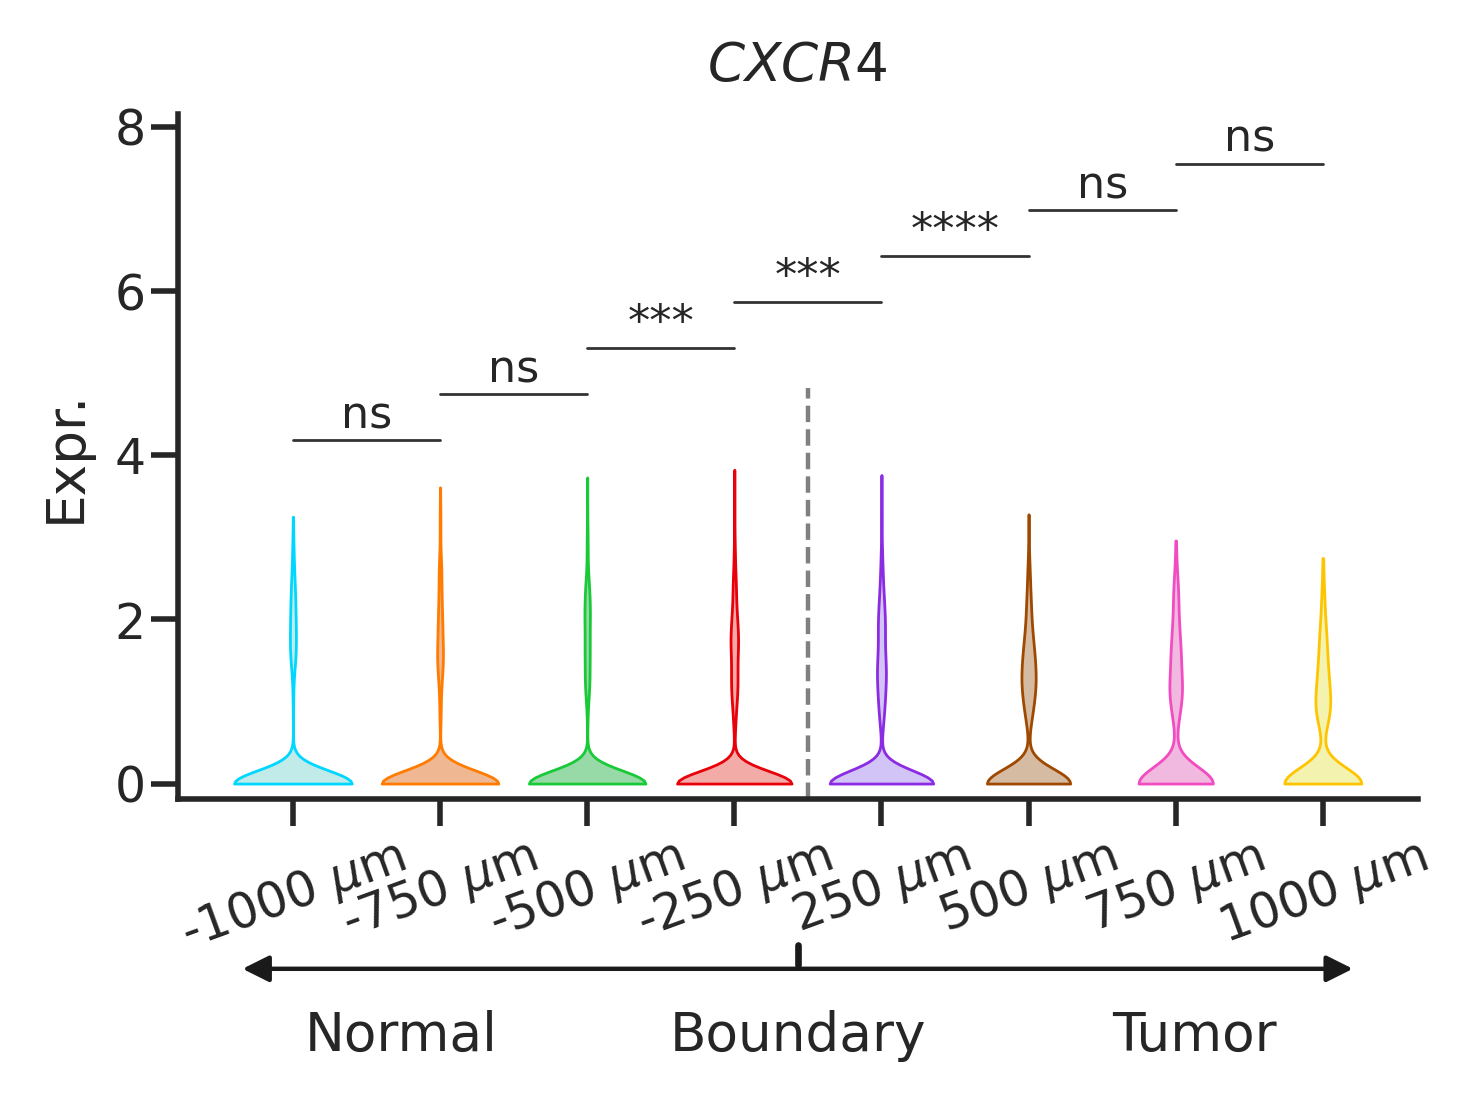

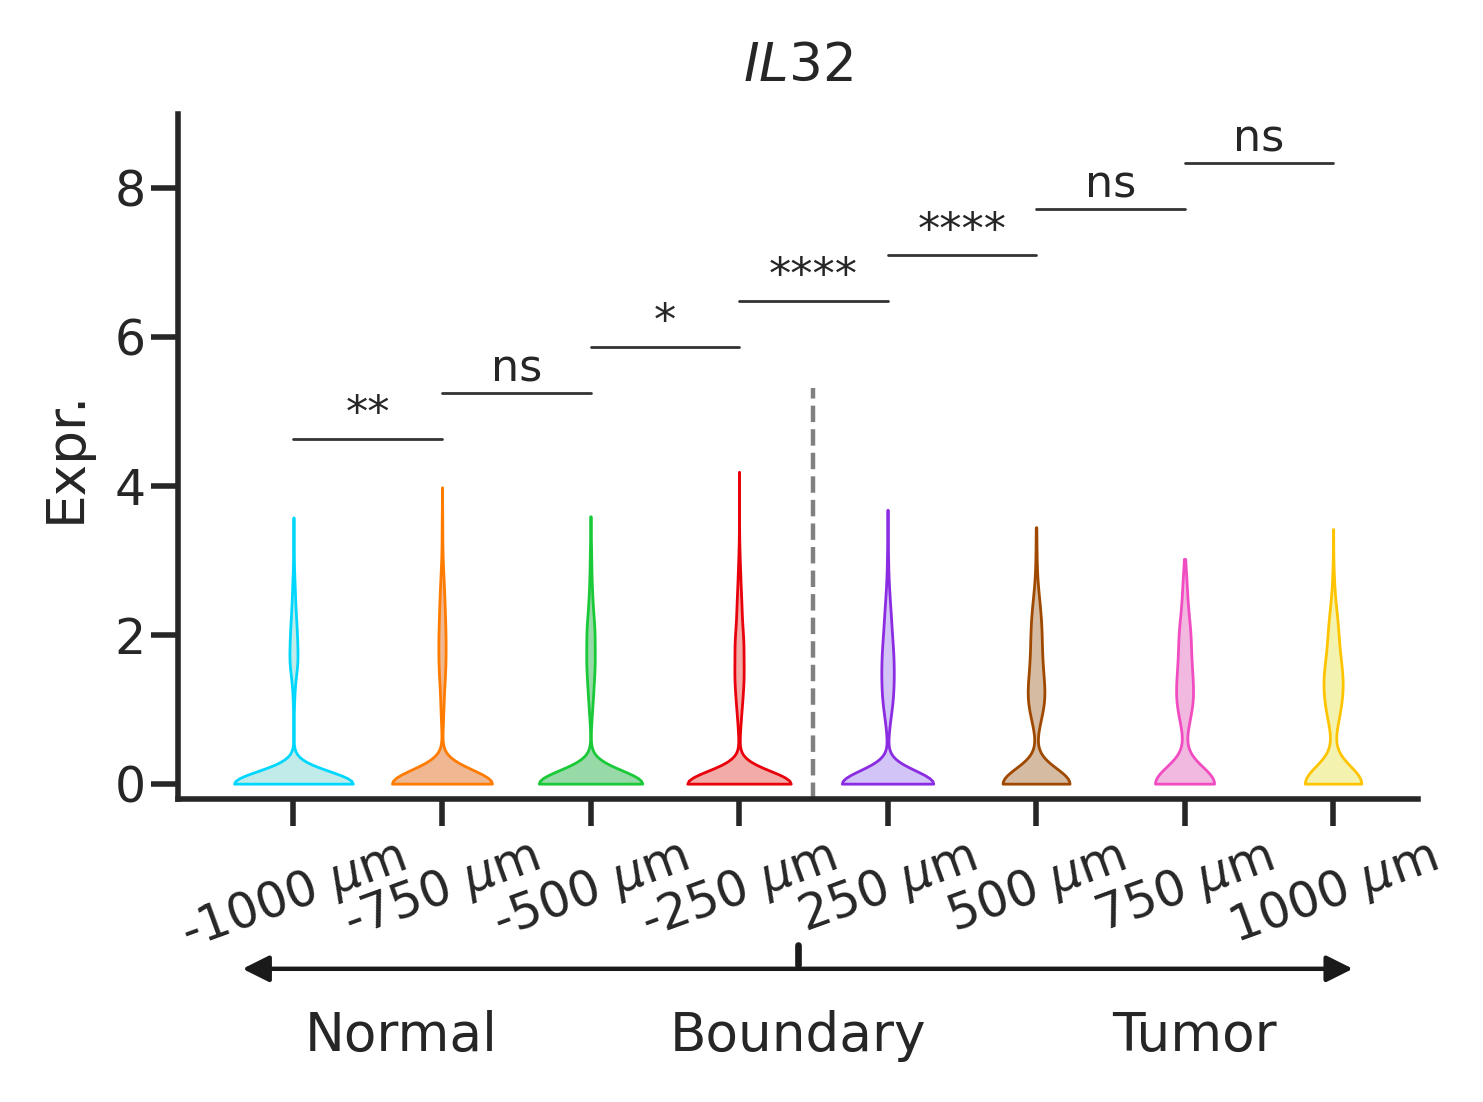

In [53]:
for gene in gene_dict[celltype]:
    plot_show(df_gene, gene, save=True,y_label='Expr.', gene=True, gene_cell_type=celltype)